# Heaps (6.1)

## Formal characteristics
- Attributes
    - length (size of the array)
    - heap-size (size of the subarray that are in a heap; can be 0)

- Properties of all heaps
    - $A[i].parent$ = $A[\lfloor i/2 \rfloor]$
    - $A[i].leftChild$ = $A[i*2]$
    - $A[i].rightChild$ = $A[i*2 + 1]$
    - Viewed as a tree
        - The height of a node in a heap is the number of edges on the longest simple downward path from the node to a leaf
        ```
              1               height = 3
            /   \
           2     8            height = 2
          / \   / \
         3   4  9  10         height = 1
        ```

- Properties of `min-heaps`
    - *min heap property*: $A[i].parent \leq A[i]$

- Properties of `max-heaps`
    - *max heap property*: $A[i].parent \geq A[i]$

- Procedures
    - $MaxHeapify$
        - Time complexity: $O(\lg n)$
        - Maintains the max-heap property
    - $BuildMaxHeap$
        - Time complexity: $O(n)$
        - Converts any array to a max-heap
    - $Heapsort$
        - Time complexity: $O(n \lg n)$
        - Sorts an array in place 
    - Priority queue procedures:
        - $MaxHeapInsert$
            - Time complexity: $O(\lg n)$
        - $HeapExtractMax$
            - Time complexity: $O(\lg n)$
        - $HeapIncreaseKey$
            - Time complexity: $O(\lg n)$
        - $HeapMaximum$
            - Time complexity: $O(\lg n)$

## Usage
- min heaps: priority queues
- max heaps: heapsort

## `class Heap`

In [1]:
from abc import ABC, abstractmethod
from typing import Callable, Any
from types import FunctionType



class Heap(ABC):
    def __init__(self, ls):
        self.ls = ls
        self.length = len(ls)
        self.heapsize = 1
        self.digraphs = []
        self.retree_animation()

    def logger(func:FunctionType):
        def log(*args):
            if not disable_logging:
                print(f'[{func.__qualname__}] {args}')
        def wrapper(*args, **kwargs):
            self = args[0] if args else None
            log(f'[{args}, {kwargs}]', 'BEFORE')
            result = func(*args, **kwargs)
            log(f'[{args}, {kwargs}]', 'AFTER')
            return result
        return wrapper

    def __getitem__(self, i):
        return self.ls[int(i)]

    def __setitem__(self, i, v):
        self.ls[int(i)] = v

    def __repr__(self):
        return f'{self.classname()} {self.ls}, heapsize: {self.heapsize}'

    @abstractmethod
    def classname(self) -> str:
        ...

    @abstractmethod
    def heap_property_violation(self, i) -> int|None:
        '''
        Describes the appropriate relationship
        between parents and children in the heap.

        :param int i: parent index, to which derived child-indices are compared
        :return: the index of the value that ought to be swapped for the value at self[i]
        :rtype: int|None
        '''
        ...

    @logger
    def heapify(self, i):
        '''
        Bubbles down values that produce a heap-property violation, starting at index i

        :param int i: parent index of the heap or subheap that will be walked.
        '''

        ...

    @logger
    def build(self) -> Heap:
        '''
        Transforms an unsorted self.ls into a heap
        that abides by the heap-property
        '''
        ...

    @logger
    def sort(self) -> list:
        '''
        Takes self.heapsize from self.length to 1, while reordering self.ls
        MaxHeap will give an ascending total order.
        MinHeap will give a descending total order.
        '''

        ...

    @logger
    def bubbleup(self:Heap, idx:int, key:int, idx_predicate:Callable[[int,int], bool]):
        '''
        Recursively increases the height of a value in the heap, until its
        relation to its parent no longer violates self.heap_prop

        :param int i: index, from which a parent-index is derived
        '''
        ...

    @logger
    def insert(self, val):
        '''
        Adds a new value to the heap, in a spot that satisfies self.heap_prop

        :param val: comparable value to insert
        '''
        ...

    @logger
    def peek(self):
        ...

    @logger
    def pop(self):
        ...
        
    @logger
    def delete(self, i):
        '''
        Removes a value from the heap and rebalances the heap accordingly

        :param int i: index to remove
        '''
        ...
        
    def _idx(self, i, fx:Callable[[int], int], basis=None):
        idx = fx(i+1) - 1
        if basis == 'length':
            return idx if idx > -1 and idx < self.length else None
        else:
            return idx if idx > -1 and idx < self.heapsize else None

    def left(self, i, basis=None):
        return self._idx(i, lambda x: x*2, basis)

    def right(self, i, basis=None):
        return self._idx(i, lambda x: x*2 + 1, basis)

    def parent(self, i, basis=None):
        return self._idx(i, lambda x: x//2, basis)

    @logger
    def swap(self, head_idx, tail_idx):
        self.highlight_edge(head_idx, tail_idx, color="red")
        temp = self[head_idx]
        self[head_idx] = self[tail_idx]
        self[tail_idx] = temp
        self.highlight_edge(head_idx, tail_idx, color="green")
        self.highlight_nodes(indices=[head_idx, tail_idx], label=str(self), digraph_idx = -2)
        self.retree_animation()

    def to_gif(self, size=500):
        ...

    def retree_animation(self, only_heap=True):
        ...

    def untree_animation(self) -> graphviz.Digraph:
        ...

    def highlight_edge(self, head_idx, tail_idx, color="red"):
        ...

    def highlight_nodes(self:Heap, indices:list[int]=[], label=None, digraph_idx=-1, retree=False):
        ...


### `class MaxHeap`

In [2]:
class MaxHeap(Heap):
    def classname(self):
        return __class__.__name__

    def heap_property_violation(self, i):
        li = self.left(i)
        ri = self.right(i)
        idx = i
        # print('---')
        # print(f'idx: self[{idx}]: {self[idx]}')
        # print(f'left: {self[li] if li else None}')
        # print(f'right: {self[ri] if ri else None}')
        if li and self[li] > self[idx]:
            idx = li
        # print(f'idx after li: self[{idx}]: {self[idx]}')
        if ri and self[ri] > self[idx]:
            idx = ri
        # print(f'idx after ri: self[{idx}]: {self[idx]}')
        # print('---')
        return idx if not idx == i else None

### `class MinHeap`

In [3]:
class MinHeap(Heap):
    def classname(self):
        return __class__.__name__
        
    def heap_property_violation(self, i):
        li = self.left(i)
        ri = self.right(i)
        idx = i
        if li and self[li] < self[idx]:
            idx = li
            # print(f'self[li] < self[idx]: {self[li]} < {self[idx]}')
        if ri and self[ri] < self[idx]:
            idx = ri
            # print(f'self[ri] < self[idx]: {self[ri]} < {self[idx]}')
        return idx if not idx == i else None

### Visualization code

#### Fixtures

In [4]:
import dotenv
dotenv.load_dotenv()
import graphviz
from graphviz import Digraph
from IPython.display import display_markdown, SVG, display_svg
import pydot
import binarytree
from wand.image import Image
import hashlib
import os
import inspect
_assets_dir = lambda self,digest: f"assets/wand/{self.classname()}/{digest}"

disable_logging:bool = False
use_graphviz:bool = True

#### `Heap.retree_animation`

In [5]:
from binarytree import NodeValueError

def retree_animation(self, only_heap=True):
    """
    Resets the animation frame to the current state of self.ls,
    represented as a tree
    """
    if use_graphviz:
        try:
            next = (
                binarytree.build(self.ls[0:self.heapsize])
                if only_heap
                else binarytree.build(self.ls[0:self.length]))
            if next:
                self.digraphs.append(next.graphviz())
        except NodeValueError as e:
            print(e)

Heap.retree_animation = retree_animation
del retree_animation

#### `Heap.untree_animation`

In [6]:
def untree_animation(self) -> graphviz.Digraph:
    """
    Resets the animation frame to the current state of self.ls,
    represented as an array
    """
    if use_graphviz:
        try:
            digraph = graphviz.Digraph()
            digraph.attr(kv="node", shape="record")
            digraph.attr(kv="node", rankdir="RL")
            digraph.attr(kv="edge", arrowtype="none")
            digraph.node(name=str(self.ls[0]), label=str(self.ls[0]))
            if len(self.ls) > 1:
                for i, v in enumerate(self.ls[1:]):
                    digraph.node(name=str(v), label=str(v))
                    digraph.edge(head_name=str(self[i]), tail_name=str(v))
            self.digraphs.append(digraph)
            return digraph
        except NodeValueError as e:
            print(e)
    
Heap.untree_animation = untree_animation
del untree_animation

#### `Heap.highlight_edge`

In [7]:
def highlight_edge(self, head_idx, tail_idx, color="red"):
    if use_graphviz:
        try:
            self.retree_animation()
            next = binarytree.build(self.ls)
            assert next
            gv = next.graphviz()
            data = pydot.graph_from_dot_data(gv.source)
            if data:
                nodes: list[pydot.core.Node] = data[0].get_nodes()
                tails = list(
                    filter(
                        lambda node: node.get_attributes().get("label")
                        == f'"<l>|<v> {self[tail_idx]}|<r>"',
                        nodes,
                    )
                )
                assert len(tails) > 0
                tail: pydot.Node = tails[0]
                heads = list(
                    filter(
                        lambda node: node.get_attributes().get("label")
                        == f'"<l>|<v> {self[head_idx]}|<r>"',
                        nodes,
                    )
                )
                assert len(heads) > 0
                head: pydot.Node = heads[0]
                gv.edge(tail_name=tail.get_name(), head_name=head.get_name(), color=color)
                self.digraphs.append(gv)
        except (IndexError,NodeValueError) as e:
            print(e)
    
Heap.highlight_edge = highlight_edge
del highlight_edge

#### `Heap.highlight_nodes`

In [8]:
def highlight_nodes(self:Heap, indices:list[int]=[], label=None, digraph_idx=-1, retree=False):
    if use_graphviz:
        try:
            if retree:
                self.retree_animation(only_heap=False)
            graphs = pydot.graph_from_dot_data(self.digraphs[digraph_idx].source)
            get_label = lambda node: node.get_attributes().get("label")
            label_tpl = lambda heap, idx: f'"<l>|<v> {heap[idx]}|<r>"'
            digraph = graphs[0]
            nodelist = digraph.get_node_list()
            labels = [label_tpl(self, idx) for idx in indices]
            for node in nodelist:
                if 'label' in node.get_attributes() and get_label(node) in labels:
                    node.set_color('green')
            if label:
                digraph.get_attributes()['label']=label
            svg = digraph.create_svg()
            display_svg(SVG(svg))
        except (IndexError,NodeValueError) as e:
            print(e)
    
Heap.highlight_nodes = highlight_nodes
del highlight_nodes

#### `gv_functions`
**Caveat emptor**: Be ***very sure*** when running this manually... in fact, probably don't.

#### `disable_graphviz`, `enable_grahviz`

`¯\_(ツ)_/¯`

In [9]:
def disable_graphviz():
    use_graphviz = False

def enable_graphviz(h:Heap):
    use_graphviz = True
    h.retree_animation()

#### Gif...
abandoned. YMMV

##### `Heap.make_gif`

In [10]:
def make_gif(self, size=500) -> tuple(str, str):
    digest = hashlib.sha256(str(self.ls).encode()).hexdigest()[:8]
    assets_dir = _assets_dir(self,digest)
    gif = f"{assets_dir}/graph.gif"
    with Image() as img:
        img.loop = 1
        try:
            os.makedirs(assets_dir, exist_ok=False)
            for i, digraph in enumerate(self.digraphs):
                path = digraph.render(
                    filename=f"frame-{i}",
                    directory=assets_dir,
                    format="png",
                    cleanup=True,
                    overwrite_source=True,
                )
                frame = Image(filename=path, width=size, height=size)
                frame.delay = 60
                img.sequence.append(frame)
            img.type = "optimize"
            img.save(filename=gif)
            return (gif or '',digest or '')
        except FileExistsError:
            return ('','')
Heap.make_gif = make_gif
del make_gif

##### `Heap.make_gif`

In [11]:
def to_gif(self:Heap, size=500):
    gif,digest = self.make_gif(size)
    last_state = self.digraphs[-1].render(
        directory=_assets_dir(self, digest),
        filename="last-state",
        format="svg",
        overwrite_source=True,
    )
    display_markdown("**Swapping process**", raw=True)
    display_markdown(f"![]({gif})", raw=True)
    display_markdown("**Final result**", raw=True)
    display_markdown(f"![]({last_state})", raw=True)
Heap.to_gif = to_gif
del to_gif

#### Test Data

In [12]:
def maxheap(ls=[5,3,4,2,1,55,33,22,44,11]):
     return MaxHeap(ls)
    
def minheap(ls=[5,3,4,2,1,55,33,22,44,11]):
     return MinHeap(ls)

## Exercises 

### Min/max cardinality of heap of height $h$ (6.1-1)
- max: $2^h$
- min: $2^{h-1} + 1$
- max number of nodes at a given height: $\lceil n/2^{h+1} \rceil$

### Show that an $n$-element heap has a height of $\lfloor \lg n \rfloor$ (6.1-2)
1. $\text{Base case}$: a 0-element heap trivially has a height of $\lfloor \lg n \rfloor$
2. $\text{Inductive hypothesis (IH)}$: $n$-element heap has a height of $\lfloor \lg n \rfloor$
3. $\text{Induction steps}$
    1. Let us assume $IH$ holds for $n$, and prove it for $n+1$.
    2. A parent node may have a maximum of 2 children
    3. We know that a min-heap like `[1,2,3]` has a height of 1 ($\lg 2$), because the maximum number of edges between the root node and a leaf is 1
    4. We know that a min-heap like `[1,2]` has a height of 1 ($\lg 2$), because the maximum number of edges between the root node and a leaf is 1
    5. We know that a min-heap like `[1]` has a height of 0 ($\lg 1$)
    6. We observe that this pattern would fan out across all children in the range of $2^i..2^{i+1}$
    7. $\therefore$ we know that an $n$-element heap has a height of $\lfloor \lg n \rfloor$
       $QED$

### Where in a max heap might the smallest element reside (6.1-4)
Assuming elements are distinct, and that the heap is balanced, the smallest element might be an element in the last $x$ elements of the heap, where $x = 2^{(\lfloor \lg n\rfloor)}$ ... but consider `[16,4,10,14,7,9,1,3,8,2]`

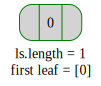

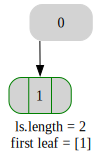

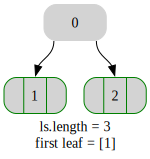

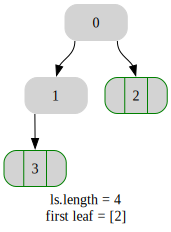

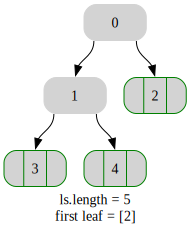

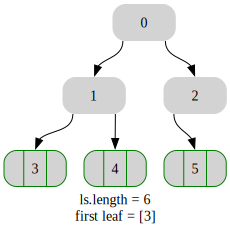

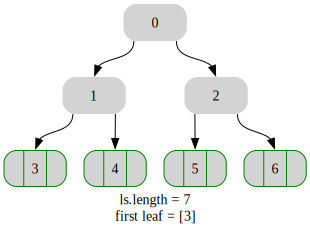

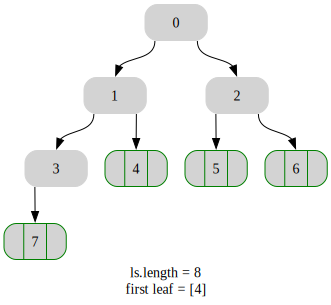

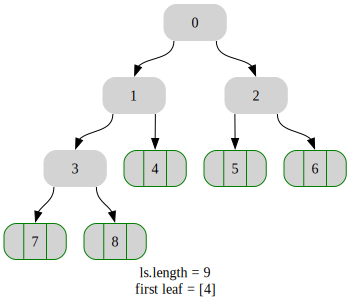

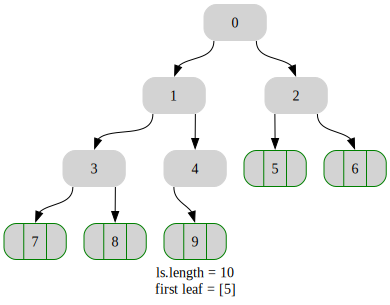

In [13]:
for i in range(1,11):
    ls = list(range(0,i))
    m = MaxHeap(ls)
    first_leaf = m.length // 2
    m.highlight_nodes(indices=range(first_leaf, m.length), label=f'ls.length = {m.length}\nfirst leaf = [{first_leaf}]' , retree=True)
# first_leaf = len(ls) // 2
# MaxHeap(ls.copy()).digraphs[-1]

*Interesting:*
`ls.length` | 0-idx first leaf | calculated
---|---|---
1  | 0 | $\lfloor 1 \div 2 \rfloor$
2  | 1 | $\lfloor 2 \div 2 \rfloor$
3  | 1 | $\lfloor 3 \div 2 \rfloor$
4  | 2 | $\lfloor 4 \div 2 \rfloor$
5  | 2 | $\lfloor 5 \div 2 \rfloor$
6  | 3 | $\lfloor 6 \div 2 \rfloor$
7  | 3 | $\lfloor 7 \div 2 \rfloor$
8  | 4 | $\lfloor 8 \div 2 \rfloor$
9  | 4 | $\lfloor 9 \div 2 \rfloor$
10 | 5 | $\lfloor 10 \div 2 \rfloor$
11 | 5 | $\lfloor 11 \div 2 \rfloor$

Generally: $\text{First-0-indexed-Leaf} = \lfloor ls.length \div 2 \rfloor$

### Is a asc-sorted array always a min-heap?
Yes!


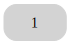

In [14]:
h = MinHeap(list(range(1, 30)))
h.digraphs[-1]

# Maintaining the heap-property (6.2)
To maintain the heap property, we call `heapify`.

## `Heap.Heapify`

In [15]:
def heapify(self:Heap, i):
    idx = self.heap_property_violation(i)
    if idx:
        self.swap(i, idx)
        self.heapify(idx)
Heap.heapify = heapify
Heap.heapify = Heap.logger(Heap.heapify)
del heapify

## Bubble up
- When a key is not in the right relation with its parent, swap it with its parent
## Bubble down
- When a key is not in the right relation with its children, swap it with one of its children
    - min-heap: swap with smallest child
    - max-heap: swap with biggest child

Time complexity: $O(\lg n)$

## Exercises
### Illustrate `max_heapify` (6.2-1)
We want to max-heapify this tree: `[27,17,3,16,13,10,1,5,7,12,4,8,9,0]` where 3 is out of place.

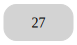

'None'

In [16]:
ls = [27,17,3,16,13,10,1,5,7,12,4,8,9,0]
h = MaxHeap(ls.copy())
digraph = h.highlight_nodes(indices=[2])
str(digraph)

[Heap.swap] ('[(MaxHeap [27, 17, 3, 16, 13, 10, 1, 5, 7, 12, 4, 8, 9, 0], heapsize: 1, 2, 5), {}]', 'BEFORE')


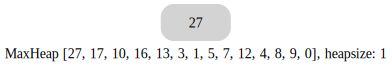

[Heap.swap] ('[(MaxHeap [27, 17, 10, 16, 13, 3, 1, 5, 7, 12, 4, 8, 9, 0], heapsize: 1, 2, 5), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [27, 17, 10, 16, 13, 3, 1, 5, 7, 12, 4, 8, 9, 0], heapsize: 1, 5, 12), {}]', 'BEFORE')


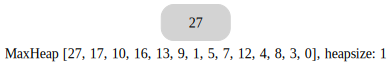

[Heap.swap] ('[(MaxHeap [27, 17, 10, 16, 13, 9, 1, 5, 7, 12, 4, 8, 3, 0], heapsize: 1, 5, 12), {}]', 'AFTER')
digraphs: 11


In [17]:
h.swap(2,5)
h.swap(5,12)
print(f'digraphs: {len(h.digraphs)}')

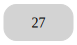

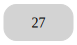

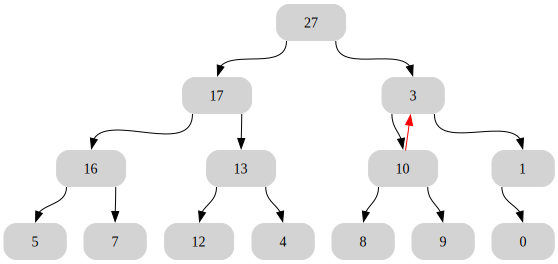

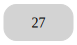

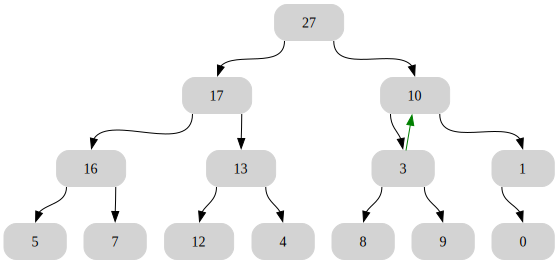

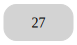

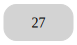

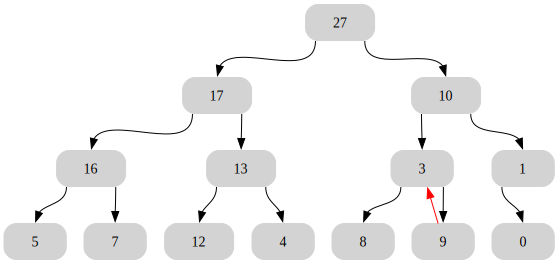

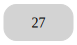

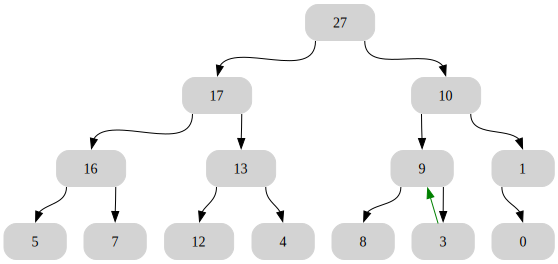

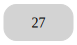

In [18]:
# self.retree_animation(only_heap=False)
for i,_ in enumerate(h.digraphs):
    h.highlight_nodes(digraph_idx=i)

### code for min-heapify (6.2-2)
The run time should be the same as max-heapify

In [19]:
def min_heapify(A, i):
    l = left(i)
    r = right(i)
    smallest = i
    '''we assume all child trees of A[i] are min-heaps and try to find the spot for A[i]'''
    if l < len(A) and A[l] < A[i]:
        smallest = l
    if r < len(A) and A[r] < A[smallest]:
        smallest = r
    if smallest != i:
        swap(A, i, smallest)
        min_heapify(A, smallest)
    

### Effect of calling `max_heapify(A,i)` when `A[i]` is larger than its children (6.2-3)
the largest encountered value is equal to `A[i]`, so no swaps take place

### Effect of calling `max_heapify(A,i)` for $i > A.heapsize / 2$ (6.2-4)
It would be like calling it on all leaves, which is useless, because they have no subtrees.

### Iterative instead of recursive implementation of `max_heapify(A,i)` (6.2-5)

### Why is the worst case running time of `max_heapify` on a heap size $n$ is $\Omega(\lg{n})$

$\text{maxheapify}(A, 0) = \Omega(\lg{n})$
- $\text{maxheapify}$ is asymptotically lower-bounded by $\lg{n}$
- $\exists{K}, \exists{N} | \forall n \leq N:  f(n) \geq K\times g(n)$

The maximum number of swaps would be swapping the root all the way down to the deepest leaf, which would take $\lg(n)$ swaps. 

# Building a heap
"bottom up", as in from the leaves to the root

## `Heap` Helper functions

In [20]:
def all_parents(h:Heap):
    return range(0, h.length//2)

def first_leaf(h:Heap):
    return h.length//2

def all_leaves(h:Heap):
    return range(h.first_leaf(), h.length)

Heap.all_parents = all_parents
del all_parents
Heap.first_leaf = first_leaf
del first_leaf
Heap.all_leaves = all_leaves
del all_leaves

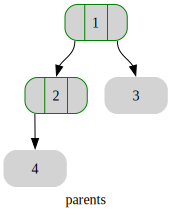

In [21]:
h = MinHeap([1,2,3,4])
h.highlight_nodes(h.all_parents(), label="parents", retree=True)

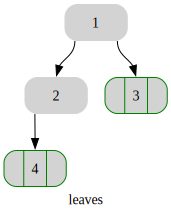

In [22]:
h.highlight_nodes(h.all_leaves(), label="leaves", retree=True)

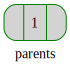

In [23]:
A = MinHeap([1,2,3,4,5])
A.highlight_nodes(h.all_parents(), label='parents')

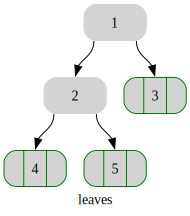

In [24]:
A.highlight_nodes(A.all_leaves(), label='leaves', retree=True)

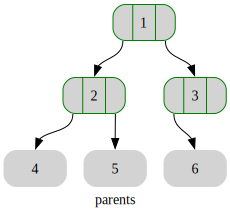

In [25]:
A = MinHeap([1,2,3,4,5,6])
A.highlight_nodes(A.all_parents(), label='parents', retree=True)

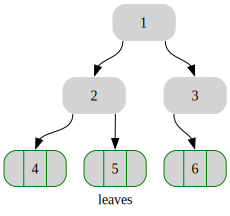

In [26]:
A.highlight_nodes(indices=A.all_leaves(), label='leaves', retree=True)

## `Heap.Build`

In [27]:
def build(self:Heap) -> Heap:
    '''
    Transforms an unsorted self.ls into a heap
    that abides by self.heap_prop
    '''
    digraphs = len(self.digraphs)
    self.heapsize = self.length
    for i in reversed(range(0, self.first_leaf())):
        print(f'====\ni: {i}\n===')
        self.heapify(i)
    if len(self.digraphs) == digraphs:
        self.retree_animation()
    return self
Heap.build = Heap.logger(build)
del build

### Demo

original: [0, 1, 3, 4, 5, 7, 8, 9, 10, 12, 13, 16, 17, 27]


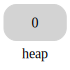

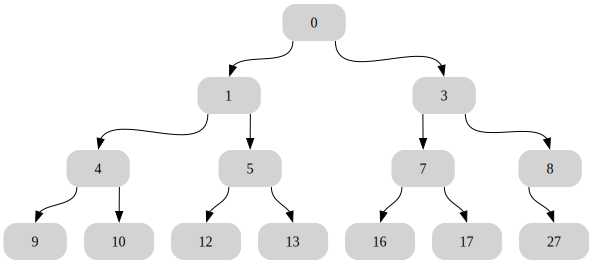

maxheap : MaxHeap [0, 1, 3, 4, 5, 7, 8, 9, 10, 12, 13, 16, 17, 27], heapsize: 1
[build] ('[(MaxHeap [0, 1, 3, 4, 5, 7, 8, 9, 10, 12, 13, 16, 17, 27], heapsize: 1,), {}]', 'BEFORE')
====
i: 6
===
[heapify] ('[(MaxHeap [0, 1, 3, 4, 5, 7, 8, 9, 10, 12, 13, 16, 17, 27], heapsize: 14, 6), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [0, 1, 3, 4, 5, 7, 8, 9, 10, 12, 13, 16, 17, 27], heapsize: 14, 6, 13), {}]', 'BEFORE')


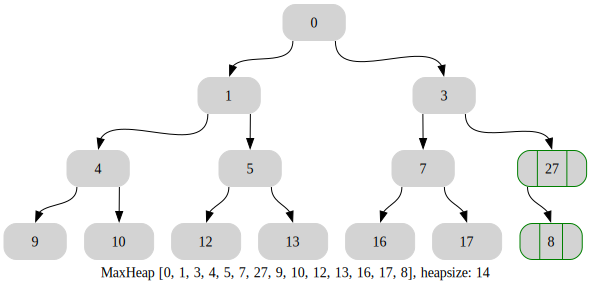

[Heap.swap] ('[(MaxHeap [0, 1, 3, 4, 5, 7, 27, 9, 10, 12, 13, 16, 17, 8], heapsize: 14, 6, 13), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 1, 3, 4, 5, 7, 27, 9, 10, 12, 13, 16, 17, 8], heapsize: 14, 13), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [0, 1, 3, 4, 5, 7, 27, 9, 10, 12, 13, 16, 17, 8], heapsize: 14, 13), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 1, 3, 4, 5, 7, 27, 9, 10, 12, 13, 16, 17, 8], heapsize: 14, 6), {}]', 'AFTER')
====
i: 5
===
[heapify] ('[(MaxHeap [0, 1, 3, 4, 5, 7, 27, 9, 10, 12, 13, 16, 17, 8], heapsize: 14, 5), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [0, 1, 3, 4, 5, 7, 27, 9, 10, 12, 13, 16, 17, 8], heapsize: 14, 5, 12), {}]', 'BEFORE')


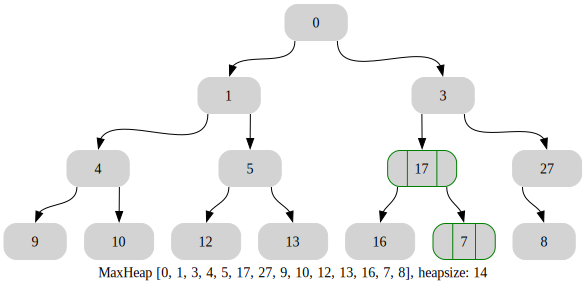

[Heap.swap] ('[(MaxHeap [0, 1, 3, 4, 5, 17, 27, 9, 10, 12, 13, 16, 7, 8], heapsize: 14, 5, 12), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 1, 3, 4, 5, 17, 27, 9, 10, 12, 13, 16, 7, 8], heapsize: 14, 12), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [0, 1, 3, 4, 5, 17, 27, 9, 10, 12, 13, 16, 7, 8], heapsize: 14, 12), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 1, 3, 4, 5, 17, 27, 9, 10, 12, 13, 16, 7, 8], heapsize: 14, 5), {}]', 'AFTER')
====
i: 4
===
[heapify] ('[(MaxHeap [0, 1, 3, 4, 5, 17, 27, 9, 10, 12, 13, 16, 7, 8], heapsize: 14, 4), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [0, 1, 3, 4, 5, 17, 27, 9, 10, 12, 13, 16, 7, 8], heapsize: 14, 4, 10), {}]', 'BEFORE')


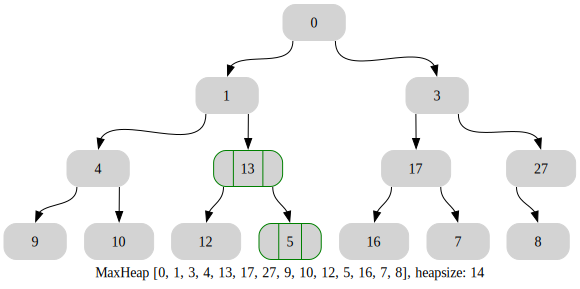

[Heap.swap] ('[(MaxHeap [0, 1, 3, 4, 13, 17, 27, 9, 10, 12, 5, 16, 7, 8], heapsize: 14, 4, 10), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 1, 3, 4, 13, 17, 27, 9, 10, 12, 5, 16, 7, 8], heapsize: 14, 10), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [0, 1, 3, 4, 13, 17, 27, 9, 10, 12, 5, 16, 7, 8], heapsize: 14, 10), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 1, 3, 4, 13, 17, 27, 9, 10, 12, 5, 16, 7, 8], heapsize: 14, 4), {}]', 'AFTER')
====
i: 3
===
[heapify] ('[(MaxHeap [0, 1, 3, 4, 13, 17, 27, 9, 10, 12, 5, 16, 7, 8], heapsize: 14, 3), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [0, 1, 3, 4, 13, 17, 27, 9, 10, 12, 5, 16, 7, 8], heapsize: 14, 3, 8), {}]', 'BEFORE')


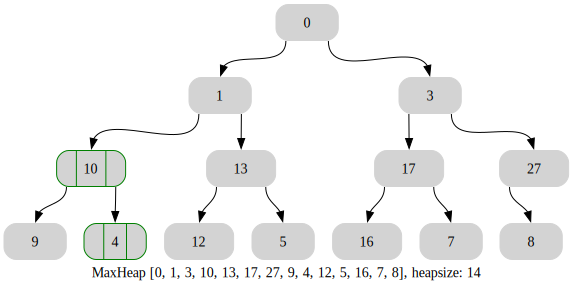

[Heap.swap] ('[(MaxHeap [0, 1, 3, 10, 13, 17, 27, 9, 4, 12, 5, 16, 7, 8], heapsize: 14, 3, 8), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 1, 3, 10, 13, 17, 27, 9, 4, 12, 5, 16, 7, 8], heapsize: 14, 8), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [0, 1, 3, 10, 13, 17, 27, 9, 4, 12, 5, 16, 7, 8], heapsize: 14, 8), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 1, 3, 10, 13, 17, 27, 9, 4, 12, 5, 16, 7, 8], heapsize: 14, 3), {}]', 'AFTER')
====
i: 2
===
[heapify] ('[(MaxHeap [0, 1, 3, 10, 13, 17, 27, 9, 4, 12, 5, 16, 7, 8], heapsize: 14, 2), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [0, 1, 3, 10, 13, 17, 27, 9, 4, 12, 5, 16, 7, 8], heapsize: 14, 2, 6), {}]', 'BEFORE')


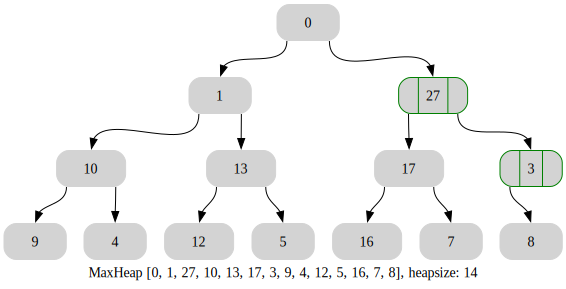

[Heap.swap] ('[(MaxHeap [0, 1, 27, 10, 13, 17, 3, 9, 4, 12, 5, 16, 7, 8], heapsize: 14, 2, 6), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 1, 27, 10, 13, 17, 3, 9, 4, 12, 5, 16, 7, 8], heapsize: 14, 6), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [0, 1, 27, 10, 13, 17, 3, 9, 4, 12, 5, 16, 7, 8], heapsize: 14, 6, 13), {}]', 'BEFORE')


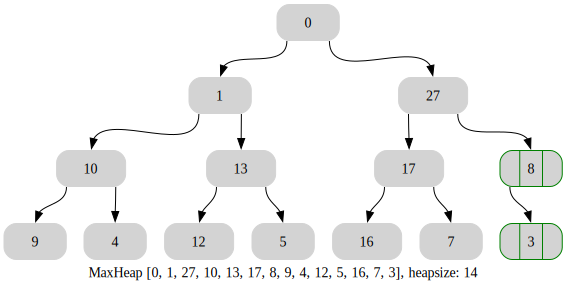

[Heap.swap] ('[(MaxHeap [0, 1, 27, 10, 13, 17, 8, 9, 4, 12, 5, 16, 7, 3], heapsize: 14, 6, 13), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 1, 27, 10, 13, 17, 8, 9, 4, 12, 5, 16, 7, 3], heapsize: 14, 13), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [0, 1, 27, 10, 13, 17, 8, 9, 4, 12, 5, 16, 7, 3], heapsize: 14, 13), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 1, 27, 10, 13, 17, 8, 9, 4, 12, 5, 16, 7, 3], heapsize: 14, 6), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 1, 27, 10, 13, 17, 8, 9, 4, 12, 5, 16, 7, 3], heapsize: 14, 2), {}]', 'AFTER')
====
i: 1
===
[heapify] ('[(MaxHeap [0, 1, 27, 10, 13, 17, 8, 9, 4, 12, 5, 16, 7, 3], heapsize: 14, 1), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [0, 1, 27, 10, 13, 17, 8, 9, 4, 12, 5, 16, 7, 3], heapsize: 14, 1, 4), {}]', 'BEFORE')


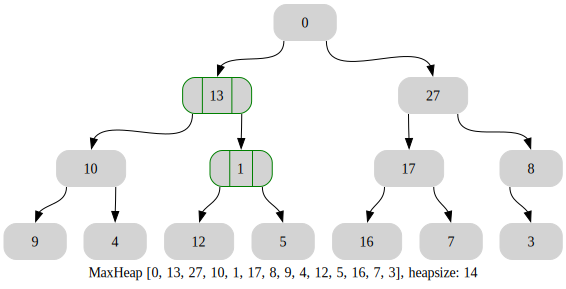

[Heap.swap] ('[(MaxHeap [0, 13, 27, 10, 1, 17, 8, 9, 4, 12, 5, 16, 7, 3], heapsize: 14, 1, 4), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 13, 27, 10, 1, 17, 8, 9, 4, 12, 5, 16, 7, 3], heapsize: 14, 4), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [0, 13, 27, 10, 1, 17, 8, 9, 4, 12, 5, 16, 7, 3], heapsize: 14, 4, 9), {}]', 'BEFORE')


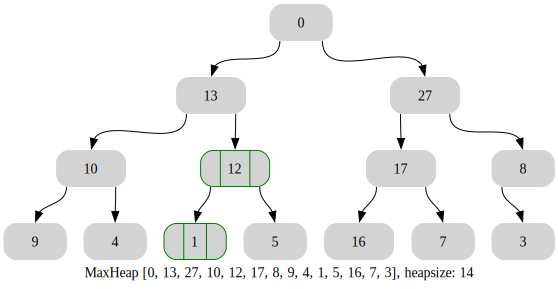

[Heap.swap] ('[(MaxHeap [0, 13, 27, 10, 12, 17, 8, 9, 4, 1, 5, 16, 7, 3], heapsize: 14, 4, 9), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 13, 27, 10, 12, 17, 8, 9, 4, 1, 5, 16, 7, 3], heapsize: 14, 9), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [0, 13, 27, 10, 12, 17, 8, 9, 4, 1, 5, 16, 7, 3], heapsize: 14, 9), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 13, 27, 10, 12, 17, 8, 9, 4, 1, 5, 16, 7, 3], heapsize: 14, 4), {}]', 'AFTER')
[heapify] ('[(MaxHeap [0, 13, 27, 10, 12, 17, 8, 9, 4, 1, 5, 16, 7, 3], heapsize: 14, 1), {}]', 'AFTER')
====
i: 0
===
[heapify] ('[(MaxHeap [0, 13, 27, 10, 12, 17, 8, 9, 4, 1, 5, 16, 7, 3], heapsize: 14, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [0, 13, 27, 10, 12, 17, 8, 9, 4, 1, 5, 16, 7, 3], heapsize: 14, 0, 2), {}]', 'BEFORE')


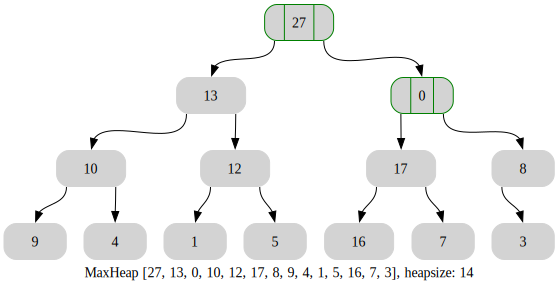

[Heap.swap] ('[(MaxHeap [27, 13, 0, 10, 12, 17, 8, 9, 4, 1, 5, 16, 7, 3], heapsize: 14, 0, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [27, 13, 0, 10, 12, 17, 8, 9, 4, 1, 5, 16, 7, 3], heapsize: 14, 2), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [27, 13, 0, 10, 12, 17, 8, 9, 4, 1, 5, 16, 7, 3], heapsize: 14, 2, 5), {}]', 'BEFORE')


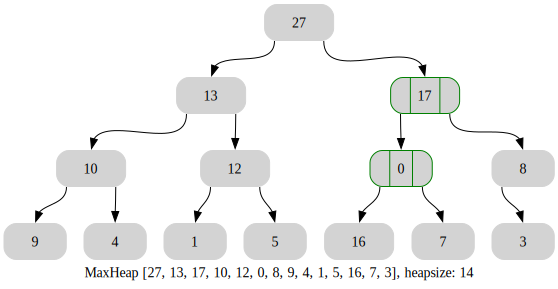

[Heap.swap] ('[(MaxHeap [27, 13, 17, 10, 12, 0, 8, 9, 4, 1, 5, 16, 7, 3], heapsize: 14, 2, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [27, 13, 17, 10, 12, 0, 8, 9, 4, 1, 5, 16, 7, 3], heapsize: 14, 5), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [27, 13, 17, 10, 12, 0, 8, 9, 4, 1, 5, 16, 7, 3], heapsize: 14, 5, 11), {}]', 'BEFORE')


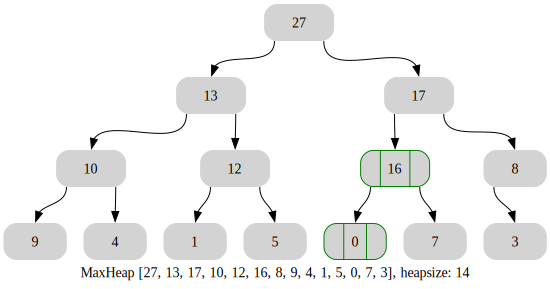

[Heap.swap] ('[(MaxHeap [27, 13, 17, 10, 12, 16, 8, 9, 4, 1, 5, 0, 7, 3], heapsize: 14, 5, 11), {}]', 'AFTER')
[heapify] ('[(MaxHeap [27, 13, 17, 10, 12, 16, 8, 9, 4, 1, 5, 0, 7, 3], heapsize: 14, 11), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [27, 13, 17, 10, 12, 16, 8, 9, 4, 1, 5, 0, 7, 3], heapsize: 14, 11), {}]', 'AFTER')
[heapify] ('[(MaxHeap [27, 13, 17, 10, 12, 16, 8, 9, 4, 1, 5, 0, 7, 3], heapsize: 14, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [27, 13, 17, 10, 12, 16, 8, 9, 4, 1, 5, 0, 7, 3], heapsize: 14, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [27, 13, 17, 10, 12, 16, 8, 9, 4, 1, 5, 0, 7, 3], heapsize: 14, 0), {}]', 'AFTER')
[build] ('[(MaxHeap [27, 13, 17, 10, 12, 16, 8, 9, 4, 1, 5, 0, 7, 3], heapsize: 14,), {}]', 'AFTER')


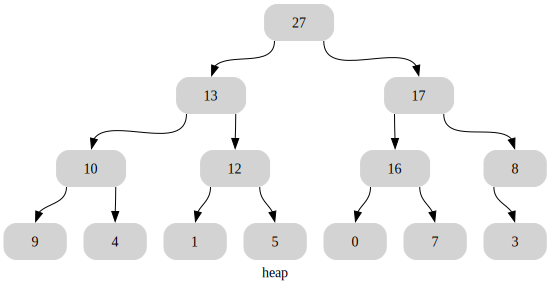

In [28]:
original = [27,17,3,16,13,10,1,5,7,12,4,8,9,0]
original.sort()
h=MaxHeap(original)
print(f'original: {original}')
h.highlight_nodes(label='heap')
h.highlight_nodes(retree=True)
print(f'maxheap : {h}')
h.build()
h.highlight_nodes(label='heap')

## Exercises

### Illustrate build-max-heap (6.3-1)
Given the input `[5,3,17,10,84,19,6,22,9]`...


[build] ('[(MaxHeap [5, 3, 17, 10, 84, 19, 6, 22, 9], heapsize: 1,), {}]', 'BEFORE')
====
i: 3
===
[heapify] ('[(MaxHeap [5, 3, 17, 10, 84, 19, 6, 22, 9], heapsize: 9, 3), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 3, 17, 10, 84, 19, 6, 22, 9], heapsize: 9, 3, 7), {}]', 'BEFORE')


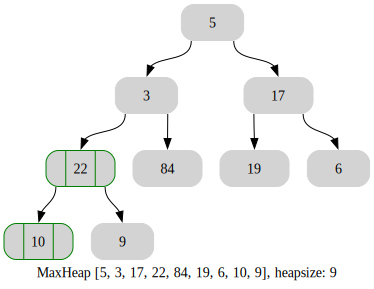

[Heap.swap] ('[(MaxHeap [5, 3, 17, 22, 84, 19, 6, 10, 9], heapsize: 9, 3, 7), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 3, 17, 22, 84, 19, 6, 10, 9], heapsize: 9, 7), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [5, 3, 17, 22, 84, 19, 6, 10, 9], heapsize: 9, 7), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 3, 17, 22, 84, 19, 6, 10, 9], heapsize: 9, 3), {}]', 'AFTER')
====
i: 2
===
[heapify] ('[(MaxHeap [5, 3, 17, 22, 84, 19, 6, 10, 9], heapsize: 9, 2), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 3, 17, 22, 84, 19, 6, 10, 9], heapsize: 9, 2, 5), {}]', 'BEFORE')


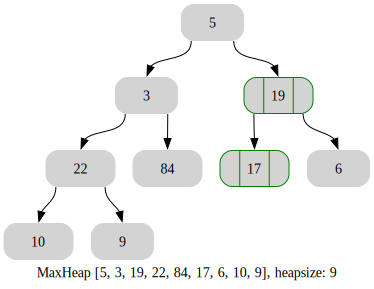

[Heap.swap] ('[(MaxHeap [5, 3, 19, 22, 84, 17, 6, 10, 9], heapsize: 9, 2, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 3, 19, 22, 84, 17, 6, 10, 9], heapsize: 9, 5), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [5, 3, 19, 22, 84, 17, 6, 10, 9], heapsize: 9, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 3, 19, 22, 84, 17, 6, 10, 9], heapsize: 9, 2), {}]', 'AFTER')
====
i: 1
===
[heapify] ('[(MaxHeap [5, 3, 19, 22, 84, 17, 6, 10, 9], heapsize: 9, 1), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 3, 19, 22, 84, 17, 6, 10, 9], heapsize: 9, 1, 4), {}]', 'BEFORE')


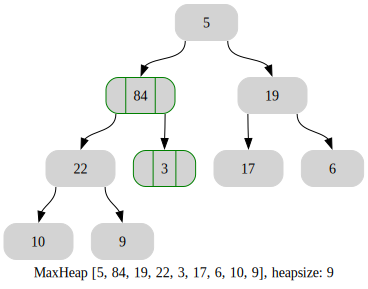

[Heap.swap] ('[(MaxHeap [5, 84, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 1, 4), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 84, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 4), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [5, 84, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 4), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 84, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 1), {}]', 'AFTER')
====
i: 0
===
[heapify] ('[(MaxHeap [5, 84, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 84, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 0, 1), {}]', 'BEFORE')


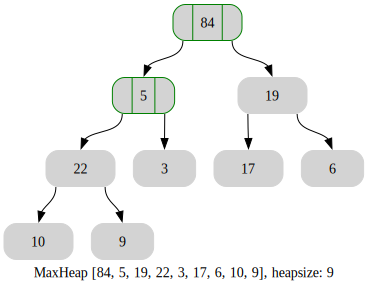

[Heap.swap] ('[(MaxHeap [84, 5, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [84, 5, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 1), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [84, 5, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 1, 3), {}]', 'BEFORE')


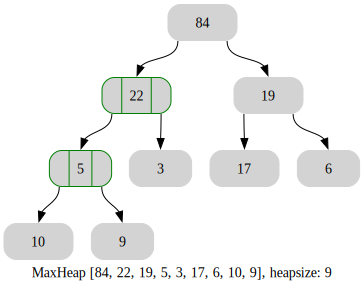

[Heap.swap] ('[(MaxHeap [84, 22, 19, 5, 3, 17, 6, 10, 9], heapsize: 9, 1, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [84, 22, 19, 5, 3, 17, 6, 10, 9], heapsize: 9, 3), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [84, 22, 19, 5, 3, 17, 6, 10, 9], heapsize: 9, 3, 7), {}]', 'BEFORE')


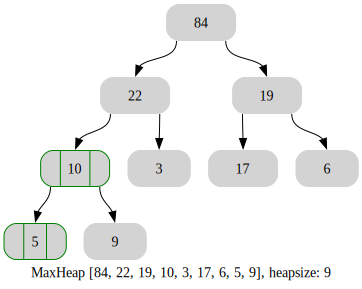

[Heap.swap] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9, 3, 7), {}]', 'AFTER')
[heapify] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9, 7), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9, 7), {}]', 'AFTER')
[heapify] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9, 0), {}]', 'AFTER')
[build] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9,), {}]', 'AFTER')
MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9


In [29]:
A = MaxHeap([5,3,17,10,84,19,6,22,9])
A.build()
print(A)

### Why decrement the loop index from the midpoint? (6.3-2)
because leafs are trivial max-heaps, and will be ordered as the first half of the array is handled

# `Heap.Sort`

In [30]:
def sort(self:Heap, reverse:bool) -> Heap:
    '''
    Takes self.heapsize from self.length to 1, while reordering self.ls
    MaxHeap will give an ascending total order.
    MinHeap will give a descending total order.
    '''
    if not self.heapsize == self.length:
        disable_graphviz()
        self.build()
        enable_graphviz(self)
    for i in reversed(range(1, self.length)):
        self.swap(0, i)
        self.heapsize -= 1
        self.heapify(0)
    if reverse:
        self.ls.reverse()
    self.digraphs.append(self.untree_animation())
    self.highlight_nodes()
    return self
Heap.sort = sort
MaxHeap.sort = MaxHeap.logger(lambda self: Heap.sort(self, reverse=False))
MinHeap.sort = MinHeap.logger(lambda self: Heap.sort(self, reverse=True))
del sort

ls: [5, 3, 17, 10, 84, 19, 6, 22, 9]
[<lambda>] ('[(MaxHeap [5, 3, 17, 10, 84, 19, 6, 22, 9], heapsize: 1,), {}]', 'BEFORE')
[build] ('[(MaxHeap [5, 3, 17, 10, 84, 19, 6, 22, 9], heapsize: 1,), {}]', 'BEFORE')
====
i: 3
===
[heapify] ('[(MaxHeap [5, 3, 17, 10, 84, 19, 6, 22, 9], heapsize: 9, 3), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 3, 17, 10, 84, 19, 6, 22, 9], heapsize: 9, 3, 7), {}]', 'BEFORE')


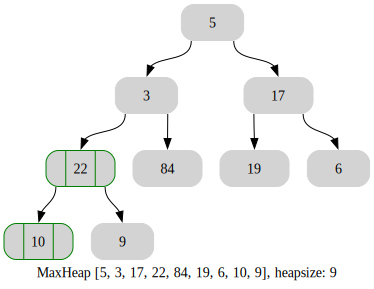

[Heap.swap] ('[(MaxHeap [5, 3, 17, 22, 84, 19, 6, 10, 9], heapsize: 9, 3, 7), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 3, 17, 22, 84, 19, 6, 10, 9], heapsize: 9, 7), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [5, 3, 17, 22, 84, 19, 6, 10, 9], heapsize: 9, 7), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 3, 17, 22, 84, 19, 6, 10, 9], heapsize: 9, 3), {}]', 'AFTER')
====
i: 2
===
[heapify] ('[(MaxHeap [5, 3, 17, 22, 84, 19, 6, 10, 9], heapsize: 9, 2), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 3, 17, 22, 84, 19, 6, 10, 9], heapsize: 9, 2, 5), {}]', 'BEFORE')


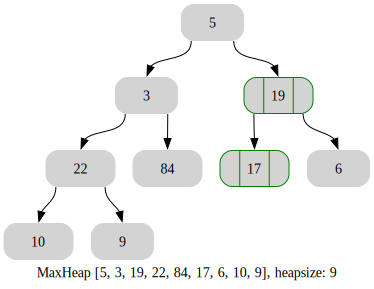

[Heap.swap] ('[(MaxHeap [5, 3, 19, 22, 84, 17, 6, 10, 9], heapsize: 9, 2, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 3, 19, 22, 84, 17, 6, 10, 9], heapsize: 9, 5), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [5, 3, 19, 22, 84, 17, 6, 10, 9], heapsize: 9, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 3, 19, 22, 84, 17, 6, 10, 9], heapsize: 9, 2), {}]', 'AFTER')
====
i: 1
===
[heapify] ('[(MaxHeap [5, 3, 19, 22, 84, 17, 6, 10, 9], heapsize: 9, 1), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 3, 19, 22, 84, 17, 6, 10, 9], heapsize: 9, 1, 4), {}]', 'BEFORE')


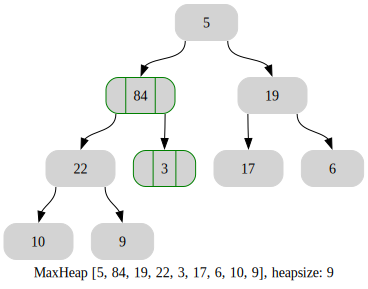

[Heap.swap] ('[(MaxHeap [5, 84, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 1, 4), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 84, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 4), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [5, 84, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 4), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 84, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 1), {}]', 'AFTER')
====
i: 0
===
[heapify] ('[(MaxHeap [5, 84, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 84, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 0, 1), {}]', 'BEFORE')


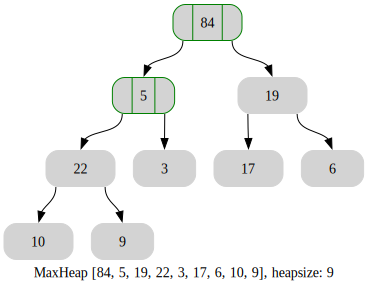

[Heap.swap] ('[(MaxHeap [84, 5, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [84, 5, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 1), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [84, 5, 19, 22, 3, 17, 6, 10, 9], heapsize: 9, 1, 3), {}]', 'BEFORE')


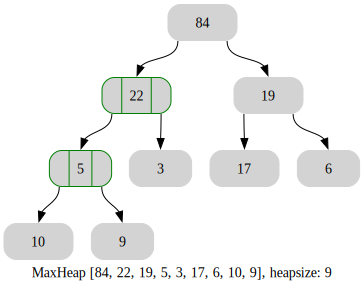

[Heap.swap] ('[(MaxHeap [84, 22, 19, 5, 3, 17, 6, 10, 9], heapsize: 9, 1, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [84, 22, 19, 5, 3, 17, 6, 10, 9], heapsize: 9, 3), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [84, 22, 19, 5, 3, 17, 6, 10, 9], heapsize: 9, 3, 7), {}]', 'BEFORE')


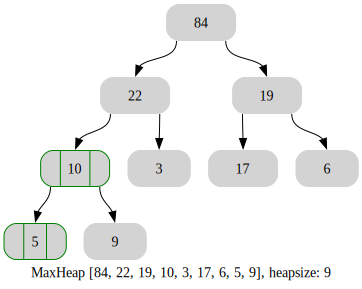

[Heap.swap] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9, 3, 7), {}]', 'AFTER')
[heapify] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9, 7), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9, 7), {}]', 'AFTER')
[heapify] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9, 0), {}]', 'AFTER')
[build] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9,), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [84, 22, 19, 10, 3, 17, 6, 5, 9], heapsize: 9, 0, 8), {}]', 'BEFORE')


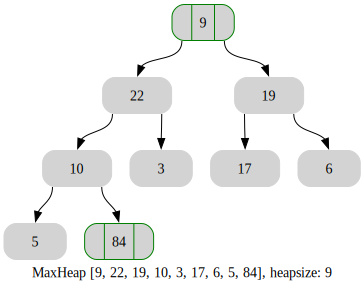

[Heap.swap] ('[(MaxHeap [9, 22, 19, 10, 3, 17, 6, 5, 84], heapsize: 9, 0, 8), {}]', 'AFTER')
[heapify] ('[(MaxHeap [9, 22, 19, 10, 3, 17, 6, 5, 84], heapsize: 8, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [9, 22, 19, 10, 3, 17, 6, 5, 84], heapsize: 8, 0, 1), {}]', 'BEFORE')


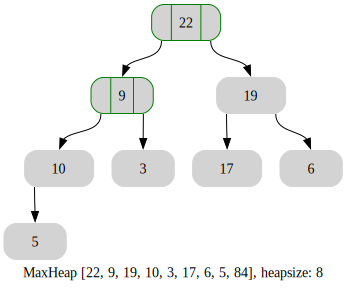

[Heap.swap] ('[(MaxHeap [22, 9, 19, 10, 3, 17, 6, 5, 84], heapsize: 8, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [22, 9, 19, 10, 3, 17, 6, 5, 84], heapsize: 8, 1), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [22, 9, 19, 10, 3, 17, 6, 5, 84], heapsize: 8, 1, 3), {}]', 'BEFORE')


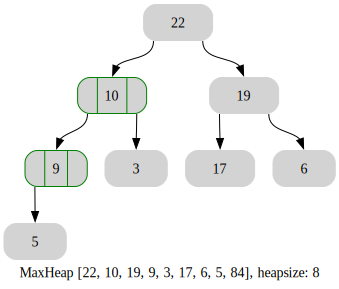

[Heap.swap] ('[(MaxHeap [22, 10, 19, 9, 3, 17, 6, 5, 84], heapsize: 8, 1, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [22, 10, 19, 9, 3, 17, 6, 5, 84], heapsize: 8, 3), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [22, 10, 19, 9, 3, 17, 6, 5, 84], heapsize: 8, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [22, 10, 19, 9, 3, 17, 6, 5, 84], heapsize: 8, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [22, 10, 19, 9, 3, 17, 6, 5, 84], heapsize: 8, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [22, 10, 19, 9, 3, 17, 6, 5, 84], heapsize: 8, 0, 7), {}]', 'BEFORE')


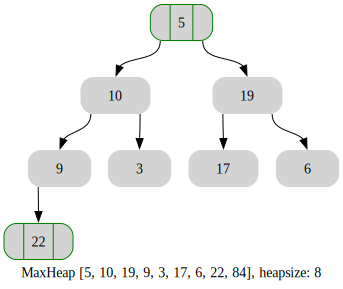

[Heap.swap] ('[(MaxHeap [5, 10, 19, 9, 3, 17, 6, 22, 84], heapsize: 8, 0, 7), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 10, 19, 9, 3, 17, 6, 22, 84], heapsize: 7, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 10, 19, 9, 3, 17, 6, 22, 84], heapsize: 7, 0, 2), {}]', 'BEFORE')


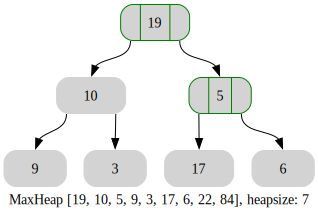

[Heap.swap] ('[(MaxHeap [19, 10, 5, 9, 3, 17, 6, 22, 84], heapsize: 7, 0, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [19, 10, 5, 9, 3, 17, 6, 22, 84], heapsize: 7, 2), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [19, 10, 5, 9, 3, 17, 6, 22, 84], heapsize: 7, 2, 5), {}]', 'BEFORE')


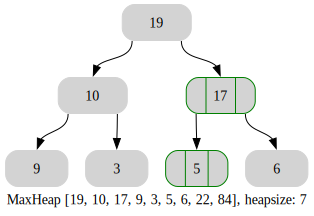

[Heap.swap] ('[(MaxHeap [19, 10, 17, 9, 3, 5, 6, 22, 84], heapsize: 7, 2, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [19, 10, 17, 9, 3, 5, 6, 22, 84], heapsize: 7, 5), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [19, 10, 17, 9, 3, 5, 6, 22, 84], heapsize: 7, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [19, 10, 17, 9, 3, 5, 6, 22, 84], heapsize: 7, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [19, 10, 17, 9, 3, 5, 6, 22, 84], heapsize: 7, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [19, 10, 17, 9, 3, 5, 6, 22, 84], heapsize: 7, 0, 6), {}]', 'BEFORE')


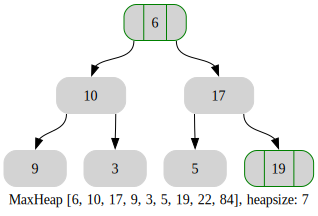

[Heap.swap] ('[(MaxHeap [6, 10, 17, 9, 3, 5, 19, 22, 84], heapsize: 7, 0, 6), {}]', 'AFTER')
[heapify] ('[(MaxHeap [6, 10, 17, 9, 3, 5, 19, 22, 84], heapsize: 6, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [6, 10, 17, 9, 3, 5, 19, 22, 84], heapsize: 6, 0, 2), {}]', 'BEFORE')


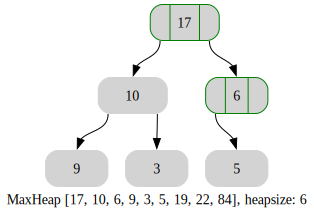

[Heap.swap] ('[(MaxHeap [17, 10, 6, 9, 3, 5, 19, 22, 84], heapsize: 6, 0, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [17, 10, 6, 9, 3, 5, 19, 22, 84], heapsize: 6, 2), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [17, 10, 6, 9, 3, 5, 19, 22, 84], heapsize: 6, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [17, 10, 6, 9, 3, 5, 19, 22, 84], heapsize: 6, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [17, 10, 6, 9, 3, 5, 19, 22, 84], heapsize: 6, 0, 5), {}]', 'BEFORE')


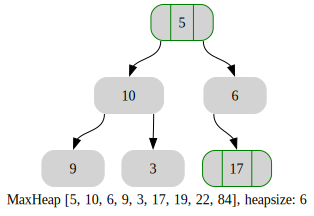

[Heap.swap] ('[(MaxHeap [5, 10, 6, 9, 3, 17, 19, 22, 84], heapsize: 6, 0, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 10, 6, 9, 3, 17, 19, 22, 84], heapsize: 5, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 10, 6, 9, 3, 17, 19, 22, 84], heapsize: 5, 0, 1), {}]', 'BEFORE')


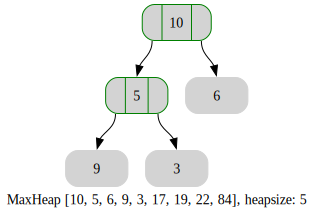

[Heap.swap] ('[(MaxHeap [10, 5, 6, 9, 3, 17, 19, 22, 84], heapsize: 5, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [10, 5, 6, 9, 3, 17, 19, 22, 84], heapsize: 5, 1), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [10, 5, 6, 9, 3, 17, 19, 22, 84], heapsize: 5, 1, 3), {}]', 'BEFORE')


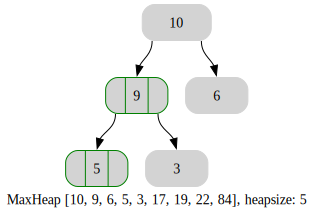

[Heap.swap] ('[(MaxHeap [10, 9, 6, 5, 3, 17, 19, 22, 84], heapsize: 5, 1, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [10, 9, 6, 5, 3, 17, 19, 22, 84], heapsize: 5, 3), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [10, 9, 6, 5, 3, 17, 19, 22, 84], heapsize: 5, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [10, 9, 6, 5, 3, 17, 19, 22, 84], heapsize: 5, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [10, 9, 6, 5, 3, 17, 19, 22, 84], heapsize: 5, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [10, 9, 6, 5, 3, 17, 19, 22, 84], heapsize: 5, 0, 4), {}]', 'BEFORE')


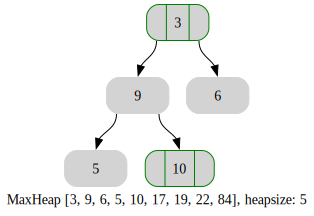

[Heap.swap] ('[(MaxHeap [3, 9, 6, 5, 10, 17, 19, 22, 84], heapsize: 5, 0, 4), {}]', 'AFTER')
[heapify] ('[(MaxHeap [3, 9, 6, 5, 10, 17, 19, 22, 84], heapsize: 4, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [3, 9, 6, 5, 10, 17, 19, 22, 84], heapsize: 4, 0, 1), {}]', 'BEFORE')


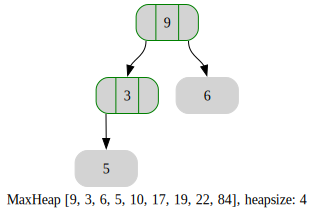

[Heap.swap] ('[(MaxHeap [9, 3, 6, 5, 10, 17, 19, 22, 84], heapsize: 4, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [9, 3, 6, 5, 10, 17, 19, 22, 84], heapsize: 4, 1), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [9, 3, 6, 5, 10, 17, 19, 22, 84], heapsize: 4, 1, 3), {}]', 'BEFORE')


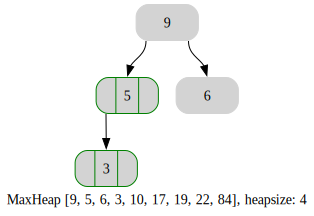

[Heap.swap] ('[(MaxHeap [9, 5, 6, 3, 10, 17, 19, 22, 84], heapsize: 4, 1, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [9, 5, 6, 3, 10, 17, 19, 22, 84], heapsize: 4, 3), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [9, 5, 6, 3, 10, 17, 19, 22, 84], heapsize: 4, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [9, 5, 6, 3, 10, 17, 19, 22, 84], heapsize: 4, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [9, 5, 6, 3, 10, 17, 19, 22, 84], heapsize: 4, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [9, 5, 6, 3, 10, 17, 19, 22, 84], heapsize: 4, 0, 3), {}]', 'BEFORE')


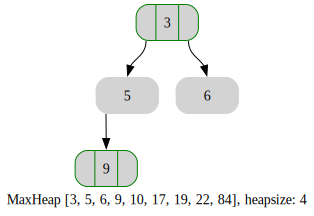

[Heap.swap] ('[(MaxHeap [3, 5, 6, 9, 10, 17, 19, 22, 84], heapsize: 4, 0, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [3, 5, 6, 9, 10, 17, 19, 22, 84], heapsize: 3, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [3, 5, 6, 9, 10, 17, 19, 22, 84], heapsize: 3, 0, 2), {}]', 'BEFORE')


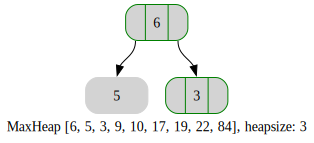

[Heap.swap] ('[(MaxHeap [6, 5, 3, 9, 10, 17, 19, 22, 84], heapsize: 3, 0, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [6, 5, 3, 9, 10, 17, 19, 22, 84], heapsize: 3, 2), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [6, 5, 3, 9, 10, 17, 19, 22, 84], heapsize: 3, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [6, 5, 3, 9, 10, 17, 19, 22, 84], heapsize: 3, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [6, 5, 3, 9, 10, 17, 19, 22, 84], heapsize: 3, 0, 2), {}]', 'BEFORE')


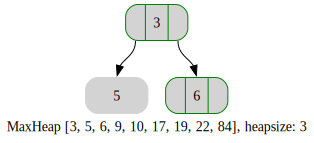

[Heap.swap] ('[(MaxHeap [3, 5, 6, 9, 10, 17, 19, 22, 84], heapsize: 3, 0, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [3, 5, 6, 9, 10, 17, 19, 22, 84], heapsize: 2, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [3, 5, 6, 9, 10, 17, 19, 22, 84], heapsize: 2, 0, 1), {}]', 'BEFORE')


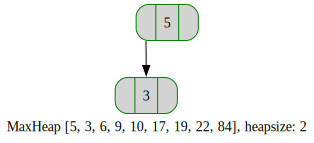

[Heap.swap] ('[(MaxHeap [5, 3, 6, 9, 10, 17, 19, 22, 84], heapsize: 2, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 3, 6, 9, 10, 17, 19, 22, 84], heapsize: 2, 1), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [5, 3, 6, 9, 10, 17, 19, 22, 84], heapsize: 2, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 3, 6, 9, 10, 17, 19, 22, 84], heapsize: 2, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [5, 3, 6, 9, 10, 17, 19, 22, 84], heapsize: 2, 0, 1), {}]', 'BEFORE')


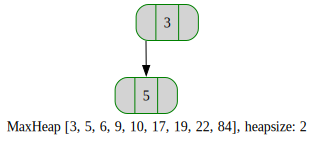

[Heap.swap] ('[(MaxHeap [3, 5, 6, 9, 10, 17, 19, 22, 84], heapsize: 2, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [3, 5, 6, 9, 10, 17, 19, 22, 84], heapsize: 1, 0), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [3, 5, 6, 9, 10, 17, 19, 22, 84], heapsize: 1, 0), {}]', 'AFTER')


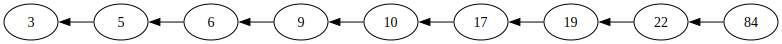

[<lambda>] ('[(MaxHeap [3, 5, 6, 9, 10, 17, 19, 22, 84], heapsize: 1,), {}]', 'AFTER')


MaxHeap [3, 5, 6, 9, 10, 17, 19, 22, 84], heapsize: 1

In [31]:
ls = [5,3,17,10,84,19,6,22,9]
print(f'ls: {ls}') 
A = MaxHeap(ls)
A.sort()

## Exercises
### Illustrate heapsort (6.4-1)


MaxHeap [5, 13, 2, 25, 7, 17, 20, 8, 4], heapsize: 1
[<lambda>] ('[(MaxHeap [5, 13, 2, 25, 7, 17, 20, 8, 4], heapsize: 1,), {}]', 'BEFORE')
[build] ('[(MaxHeap [5, 13, 2, 25, 7, 17, 20, 8, 4], heapsize: 1,), {}]', 'BEFORE')
====
i: 3
===
[heapify] ('[(MaxHeap [5, 13, 2, 25, 7, 17, 20, 8, 4], heapsize: 9, 3), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [5, 13, 2, 25, 7, 17, 20, 8, 4], heapsize: 9, 3), {}]', 'AFTER')
====
i: 2
===
[heapify] ('[(MaxHeap [5, 13, 2, 25, 7, 17, 20, 8, 4], heapsize: 9, 2), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 13, 2, 25, 7, 17, 20, 8, 4], heapsize: 9, 2, 6), {}]', 'BEFORE')


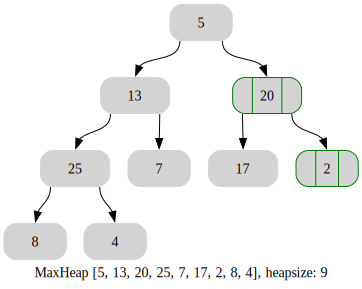

[Heap.swap] ('[(MaxHeap [5, 13, 20, 25, 7, 17, 2, 8, 4], heapsize: 9, 2, 6), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 13, 20, 25, 7, 17, 2, 8, 4], heapsize: 9, 6), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [5, 13, 20, 25, 7, 17, 2, 8, 4], heapsize: 9, 6), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 13, 20, 25, 7, 17, 2, 8, 4], heapsize: 9, 2), {}]', 'AFTER')
====
i: 1
===
[heapify] ('[(MaxHeap [5, 13, 20, 25, 7, 17, 2, 8, 4], heapsize: 9, 1), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 13, 20, 25, 7, 17, 2, 8, 4], heapsize: 9, 1, 3), {}]', 'BEFORE')


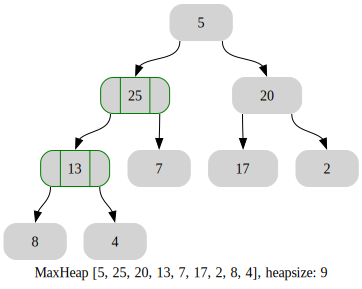

[Heap.swap] ('[(MaxHeap [5, 25, 20, 13, 7, 17, 2, 8, 4], heapsize: 9, 1, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 25, 20, 13, 7, 17, 2, 8, 4], heapsize: 9, 3), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [5, 25, 20, 13, 7, 17, 2, 8, 4], heapsize: 9, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 25, 20, 13, 7, 17, 2, 8, 4], heapsize: 9, 1), {}]', 'AFTER')
====
i: 0
===
[heapify] ('[(MaxHeap [5, 25, 20, 13, 7, 17, 2, 8, 4], heapsize: 9, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 25, 20, 13, 7, 17, 2, 8, 4], heapsize: 9, 0, 1), {}]', 'BEFORE')


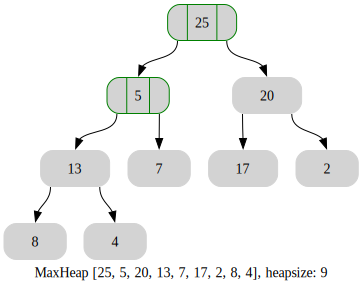

[Heap.swap] ('[(MaxHeap [25, 5, 20, 13, 7, 17, 2, 8, 4], heapsize: 9, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [25, 5, 20, 13, 7, 17, 2, 8, 4], heapsize: 9, 1), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [25, 5, 20, 13, 7, 17, 2, 8, 4], heapsize: 9, 1, 3), {}]', 'BEFORE')


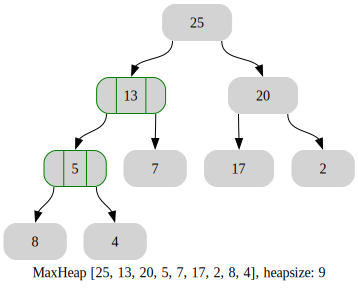

[Heap.swap] ('[(MaxHeap [25, 13, 20, 5, 7, 17, 2, 8, 4], heapsize: 9, 1, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [25, 13, 20, 5, 7, 17, 2, 8, 4], heapsize: 9, 3), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [25, 13, 20, 5, 7, 17, 2, 8, 4], heapsize: 9, 3, 7), {}]', 'BEFORE')


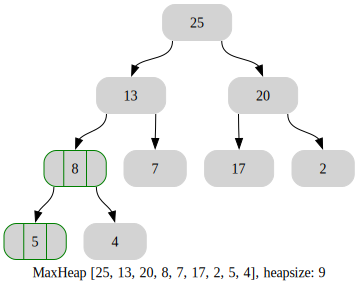

[Heap.swap] ('[(MaxHeap [25, 13, 20, 8, 7, 17, 2, 5, 4], heapsize: 9, 3, 7), {}]', 'AFTER')
[heapify] ('[(MaxHeap [25, 13, 20, 8, 7, 17, 2, 5, 4], heapsize: 9, 7), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [25, 13, 20, 8, 7, 17, 2, 5, 4], heapsize: 9, 7), {}]', 'AFTER')
[heapify] ('[(MaxHeap [25, 13, 20, 8, 7, 17, 2, 5, 4], heapsize: 9, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [25, 13, 20, 8, 7, 17, 2, 5, 4], heapsize: 9, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [25, 13, 20, 8, 7, 17, 2, 5, 4], heapsize: 9, 0), {}]', 'AFTER')
[build] ('[(MaxHeap [25, 13, 20, 8, 7, 17, 2, 5, 4], heapsize: 9,), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [25, 13, 20, 8, 7, 17, 2, 5, 4], heapsize: 9, 0, 8), {}]', 'BEFORE')


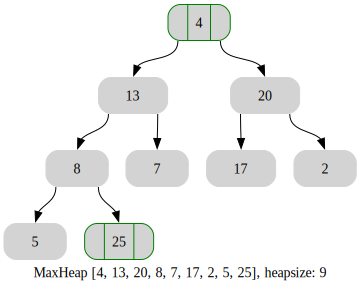

[Heap.swap] ('[(MaxHeap [4, 13, 20, 8, 7, 17, 2, 5, 25], heapsize: 9, 0, 8), {}]', 'AFTER')
[heapify] ('[(MaxHeap [4, 13, 20, 8, 7, 17, 2, 5, 25], heapsize: 8, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [4, 13, 20, 8, 7, 17, 2, 5, 25], heapsize: 8, 0, 2), {}]', 'BEFORE')


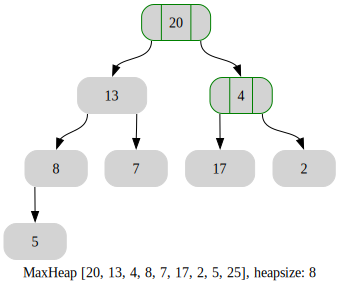

[Heap.swap] ('[(MaxHeap [20, 13, 4, 8, 7, 17, 2, 5, 25], heapsize: 8, 0, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [20, 13, 4, 8, 7, 17, 2, 5, 25], heapsize: 8, 2), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [20, 13, 4, 8, 7, 17, 2, 5, 25], heapsize: 8, 2, 5), {}]', 'BEFORE')


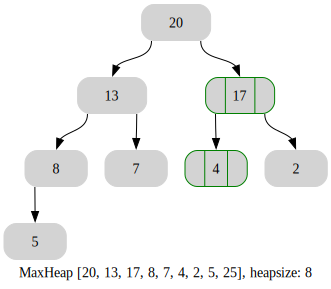

[Heap.swap] ('[(MaxHeap [20, 13, 17, 8, 7, 4, 2, 5, 25], heapsize: 8, 2, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [20, 13, 17, 8, 7, 4, 2, 5, 25], heapsize: 8, 5), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [20, 13, 17, 8, 7, 4, 2, 5, 25], heapsize: 8, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [20, 13, 17, 8, 7, 4, 2, 5, 25], heapsize: 8, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [20, 13, 17, 8, 7, 4, 2, 5, 25], heapsize: 8, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [20, 13, 17, 8, 7, 4, 2, 5, 25], heapsize: 8, 0, 7), {}]', 'BEFORE')


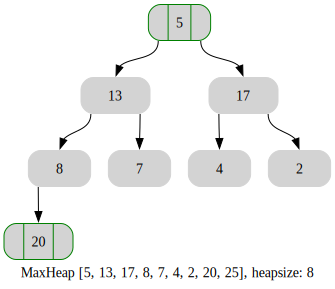

[Heap.swap] ('[(MaxHeap [5, 13, 17, 8, 7, 4, 2, 20, 25], heapsize: 8, 0, 7), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 13, 17, 8, 7, 4, 2, 20, 25], heapsize: 7, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [5, 13, 17, 8, 7, 4, 2, 20, 25], heapsize: 7, 0, 2), {}]', 'BEFORE')


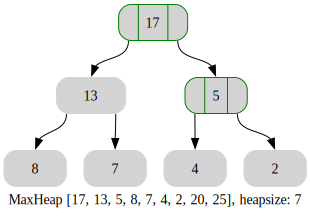

[Heap.swap] ('[(MaxHeap [17, 13, 5, 8, 7, 4, 2, 20, 25], heapsize: 7, 0, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [17, 13, 5, 8, 7, 4, 2, 20, 25], heapsize: 7, 2), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [17, 13, 5, 8, 7, 4, 2, 20, 25], heapsize: 7, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [17, 13, 5, 8, 7, 4, 2, 20, 25], heapsize: 7, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [17, 13, 5, 8, 7, 4, 2, 20, 25], heapsize: 7, 0, 6), {}]', 'BEFORE')


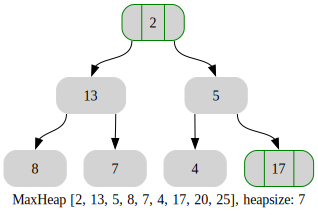

[Heap.swap] ('[(MaxHeap [2, 13, 5, 8, 7, 4, 17, 20, 25], heapsize: 7, 0, 6), {}]', 'AFTER')
[heapify] ('[(MaxHeap [2, 13, 5, 8, 7, 4, 17, 20, 25], heapsize: 6, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [2, 13, 5, 8, 7, 4, 17, 20, 25], heapsize: 6, 0, 1), {}]', 'BEFORE')


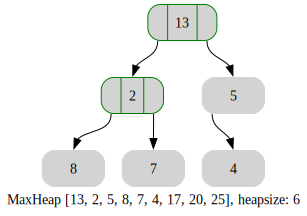

[Heap.swap] ('[(MaxHeap [13, 2, 5, 8, 7, 4, 17, 20, 25], heapsize: 6, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [13, 2, 5, 8, 7, 4, 17, 20, 25], heapsize: 6, 1), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [13, 2, 5, 8, 7, 4, 17, 20, 25], heapsize: 6, 1, 3), {}]', 'BEFORE')


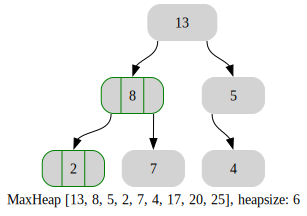

[Heap.swap] ('[(MaxHeap [13, 8, 5, 2, 7, 4, 17, 20, 25], heapsize: 6, 1, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [13, 8, 5, 2, 7, 4, 17, 20, 25], heapsize: 6, 3), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [13, 8, 5, 2, 7, 4, 17, 20, 25], heapsize: 6, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [13, 8, 5, 2, 7, 4, 17, 20, 25], heapsize: 6, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [13, 8, 5, 2, 7, 4, 17, 20, 25], heapsize: 6, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [13, 8, 5, 2, 7, 4, 17, 20, 25], heapsize: 6, 0, 5), {}]', 'BEFORE')


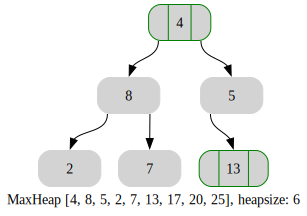

[Heap.swap] ('[(MaxHeap [4, 8, 5, 2, 7, 13, 17, 20, 25], heapsize: 6, 0, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [4, 8, 5, 2, 7, 13, 17, 20, 25], heapsize: 5, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [4, 8, 5, 2, 7, 13, 17, 20, 25], heapsize: 5, 0, 1), {}]', 'BEFORE')


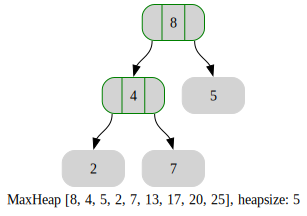

[Heap.swap] ('[(MaxHeap [8, 4, 5, 2, 7, 13, 17, 20, 25], heapsize: 5, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [8, 4, 5, 2, 7, 13, 17, 20, 25], heapsize: 5, 1), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [8, 4, 5, 2, 7, 13, 17, 20, 25], heapsize: 5, 1, 4), {}]', 'BEFORE')


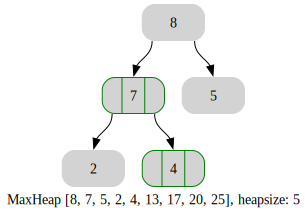

[Heap.swap] ('[(MaxHeap [8, 7, 5, 2, 4, 13, 17, 20, 25], heapsize: 5, 1, 4), {}]', 'AFTER')
[heapify] ('[(MaxHeap [8, 7, 5, 2, 4, 13, 17, 20, 25], heapsize: 5, 4), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [8, 7, 5, 2, 4, 13, 17, 20, 25], heapsize: 5, 4), {}]', 'AFTER')
[heapify] ('[(MaxHeap [8, 7, 5, 2, 4, 13, 17, 20, 25], heapsize: 5, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [8, 7, 5, 2, 4, 13, 17, 20, 25], heapsize: 5, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [8, 7, 5, 2, 4, 13, 17, 20, 25], heapsize: 5, 0, 4), {}]', 'BEFORE')


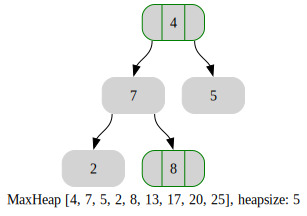

[Heap.swap] ('[(MaxHeap [4, 7, 5, 2, 8, 13, 17, 20, 25], heapsize: 5, 0, 4), {}]', 'AFTER')
[heapify] ('[(MaxHeap [4, 7, 5, 2, 8, 13, 17, 20, 25], heapsize: 4, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [4, 7, 5, 2, 8, 13, 17, 20, 25], heapsize: 4, 0, 1), {}]', 'BEFORE')


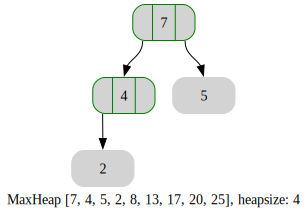

[Heap.swap] ('[(MaxHeap [7, 4, 5, 2, 8, 13, 17, 20, 25], heapsize: 4, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [7, 4, 5, 2, 8, 13, 17, 20, 25], heapsize: 4, 1), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [7, 4, 5, 2, 8, 13, 17, 20, 25], heapsize: 4, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [7, 4, 5, 2, 8, 13, 17, 20, 25], heapsize: 4, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [7, 4, 5, 2, 8, 13, 17, 20, 25], heapsize: 4, 0, 3), {}]', 'BEFORE')


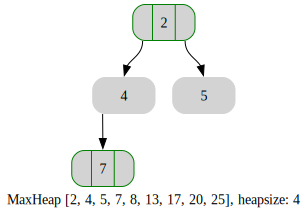

[Heap.swap] ('[(MaxHeap [2, 4, 5, 7, 8, 13, 17, 20, 25], heapsize: 4, 0, 3), {}]', 'AFTER')
[heapify] ('[(MaxHeap [2, 4, 5, 7, 8, 13, 17, 20, 25], heapsize: 3, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [2, 4, 5, 7, 8, 13, 17, 20, 25], heapsize: 3, 0, 2), {}]', 'BEFORE')


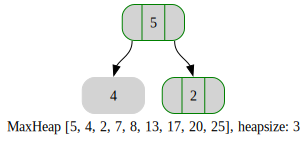

[Heap.swap] ('[(MaxHeap [5, 4, 2, 7, 8, 13, 17, 20, 25], heapsize: 3, 0, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 4, 2, 7, 8, 13, 17, 20, 25], heapsize: 3, 2), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [5, 4, 2, 7, 8, 13, 17, 20, 25], heapsize: 3, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [5, 4, 2, 7, 8, 13, 17, 20, 25], heapsize: 3, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [5, 4, 2, 7, 8, 13, 17, 20, 25], heapsize: 3, 0, 2), {}]', 'BEFORE')


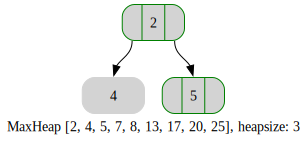

[Heap.swap] ('[(MaxHeap [2, 4, 5, 7, 8, 13, 17, 20, 25], heapsize: 3, 0, 2), {}]', 'AFTER')
[heapify] ('[(MaxHeap [2, 4, 5, 7, 8, 13, 17, 20, 25], heapsize: 2, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [2, 4, 5, 7, 8, 13, 17, 20, 25], heapsize: 2, 0, 1), {}]', 'BEFORE')


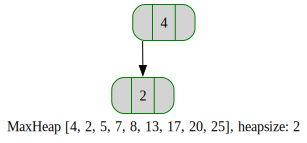

[Heap.swap] ('[(MaxHeap [4, 2, 5, 7, 8, 13, 17, 20, 25], heapsize: 2, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [4, 2, 5, 7, 8, 13, 17, 20, 25], heapsize: 2, 1), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [4, 2, 5, 7, 8, 13, 17, 20, 25], heapsize: 2, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [4, 2, 5, 7, 8, 13, 17, 20, 25], heapsize: 2, 0), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [4, 2, 5, 7, 8, 13, 17, 20, 25], heapsize: 2, 0, 1), {}]', 'BEFORE')


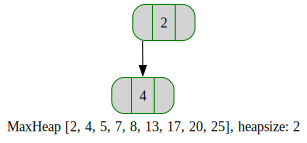

[Heap.swap] ('[(MaxHeap [2, 4, 5, 7, 8, 13, 17, 20, 25], heapsize: 2, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [2, 4, 5, 7, 8, 13, 17, 20, 25], heapsize: 1, 0), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [2, 4, 5, 7, 8, 13, 17, 20, 25], heapsize: 1, 0), {}]', 'AFTER')


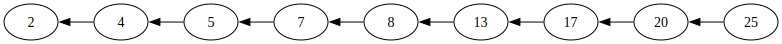

[<lambda>] ('[(MaxHeap [2, 4, 5, 7, 8, 13, 17, 20, 25], heapsize: 1,), {}]', 'AFTER')


MaxHeap [2, 4, 5, 7, 8, 13, 17, 20, 25], heapsize: 1

In [32]:
A = MaxHeap([5,13,2,25,7,17,20,8,4])
print(A)
A.sort()

### Argue the correctness of HeapSort (6.4-2)

```pseudo
1  HeapSort(A)
2      BuildMaxHeap(A)
3      for i = A.length downto 2
4          exchange A[1] with A[i]
5          A.heap-size = A.heap-size - 1
6          MaxHeapify(A, 1)
```

> $\text{Loop Invariant}:$ At the start of each iteration of the **for** loop of lines 2-5,
>  the subarray $A[1..i]$ is a max-heap containing the $i$ smallest elements of $A[1..n]$,
>  and the subarray $A[n+1..n]$ contains the $n-i$ largest elements of  $A[i+1..n]$, sorted.

$\text{Initialization:}$ Before the first iteration, we know that the entirety of $A$ abides by the Loop Invariant because we have proven elsewhere that `BuildMaxHeap` yields a max heap.

$\text{Maintenance:}$ As the for loop iteratively decrements $i$, MaxHeapify is the last function to touch A. This guarantees the Loop Invariant because every child of a max-heap is a max-heap, and callign MaxHeapify has been proven to yeild a maxheap. The size of the resultant maxheap decreases by 1 with every iteration. 

$\text{Termination:}$ At the end of the for loop, all elements will have beeN removed from the max heap, and tehy are all max heaps unto them self

### Time complexity of heapsort (6.4-3)

Regardless of whether A arrives sorted ascendingly or descendingly, the time complexity is $\Theta(n \lg n)$

# Priority Queues
## Supported Methods

### `Heap.BubbleUp`

In [33]:
def bubbleup(self:Heap, idx:int, key:int, idx_predicate:Callable[[int,int], bool]):
    assert idx_predicate(idx, key), f'key ({key}) breaks heap property with regard to self[{idx}] ({self[idx]})'
    self[idx] = key
    while idx > 0 and self.heap_property_violation(self.parent(idx)):
        self.swap(idx, self.parent(idx))
        idx = self.parent(idx)
Heap.bubbleup = Heap.logger(bubbleup)
MaxHeap.bubbleup = lambda self, idx, key: Heap.bubbleup(self, idx=idx, key=key, idx_predicate=lambda idx, key: not float(key[0] if type(key) == tuple else key) < float(self[idx]))
MinHeap.bubbleup = lambda self, idx, key: Heap.bubbleup(self, idx=idx, key=key, idx_predicate=lambda idx, key: not float(key[0] if type(key) == tuple else key) > float(self[idx]))
del bubbleup

### `Heap.Peek`

In [34]:
def peek(self:MaxHeap):
    return self[0] if self.ls else None
Heap.peek = Heap.logger(peek)
del peek

### `Heap.Pop`

In [35]:
def pop(self:Heap):
    assert self.heapsize > 0, 'heap underflow'
    if not self.heapsize == self.length:
        self.build()
    if self.heapsize==0:
        return None
    head = self.peek()
    last = self.heapsize - 1
    self[0] = self[last]
    self.heapsize -= 1
    self.heapify(0)
    self.ls = self.ls[:-1]
    self.length -= 1
    print(f'Heap.pop -> {head}')
    return head
Heap.pop = Heap.logger(pop)
del pop

### `Heap.Insert`

In [36]:
def insert(self:Heap, key, sentinel):
    if not self.heapsize == self.length:
        self.build()
    self.length += 1
    self.heapsize += 1
    self.ls.append((sentinel))
    self.bubbleup(self.heapsize-1, key)
Heap.insert = Heap.logger(insert)
MaxHeap.insert = lambda heap, key: Heap.insert(heap, key=key, sentinel=float('-inf'))
MinHeap.insert = lambda heap, key: Heap.insert(heap, key=key, sentinel=float('inf'))

## Exercises

### Illustrate MaxHeap.pop

[pop] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 0, 6, 2, 1], heapsize: 1,), {}]', 'BEFORE')
[build] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 0, 6, 2, 1], heapsize: 1,), {}]', 'BEFORE')
====
i: 4
===
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 0, 6, 2, 1], heapsize: 11, 4), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 0, 6, 2, 1], heapsize: 11, 4), {}]', 'AFTER')
====
i: 3
===
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 0, 6, 2, 1], heapsize: 11, 3), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 0, 6, 2, 1], heapsize: 11, 3, 8), {}]', 'BEFORE')


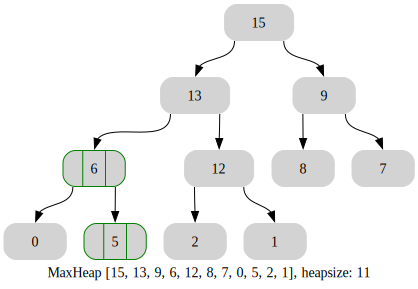

[Heap.swap] ('[(MaxHeap [15, 13, 9, 6, 12, 8, 7, 0, 5, 2, 1], heapsize: 11, 3, 8), {}]', 'AFTER')
[heapify] ('[(MaxHeap [15, 13, 9, 6, 12, 8, 7, 0, 5, 2, 1], heapsize: 11, 8), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 9, 6, 12, 8, 7, 0, 5, 2, 1], heapsize: 11, 8), {}]', 'AFTER')
[heapify] ('[(MaxHeap [15, 13, 9, 6, 12, 8, 7, 0, 5, 2, 1], heapsize: 11, 3), {}]', 'AFTER')
====
i: 2
===
[heapify] ('[(MaxHeap [15, 13, 9, 6, 12, 8, 7, 0, 5, 2, 1], heapsize: 11, 2), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 9, 6, 12, 8, 7, 0, 5, 2, 1], heapsize: 11, 2), {}]', 'AFTER')
====
i: 1
===
[heapify] ('[(MaxHeap [15, 13, 9, 6, 12, 8, 7, 0, 5, 2, 1], heapsize: 11, 1), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 9, 6, 12, 8, 7, 0, 5, 2, 1], heapsize: 11, 1), {}]', 'AFTER')
====
i: 0
===
[heapify] ('[(MaxHeap [15, 13, 9, 6, 12, 8, 7, 0, 5, 2, 1], heapsize: 11, 0), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 9, 6, 12, 8, 7, 0, 5, 2, 1], heapsize: 11, 0), {}]', 'AFTER')
[build] ('[(MaxHeap

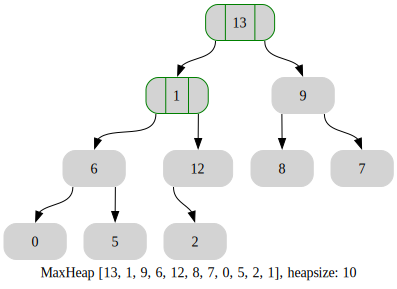

[Heap.swap] ('[(MaxHeap [13, 1, 9, 6, 12, 8, 7, 0, 5, 2, 1], heapsize: 10, 0, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [13, 1, 9, 6, 12, 8, 7, 0, 5, 2, 1], heapsize: 10, 1), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [13, 1, 9, 6, 12, 8, 7, 0, 5, 2, 1], heapsize: 10, 1, 4), {}]', 'BEFORE')


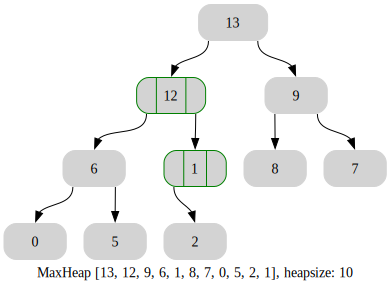

[Heap.swap] ('[(MaxHeap [13, 12, 9, 6, 1, 8, 7, 0, 5, 2, 1], heapsize: 10, 1, 4), {}]', 'AFTER')
[heapify] ('[(MaxHeap [13, 12, 9, 6, 1, 8, 7, 0, 5, 2, 1], heapsize: 10, 4), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [13, 12, 9, 6, 1, 8, 7, 0, 5, 2, 1], heapsize: 10, 4, 9), {}]', 'BEFORE')


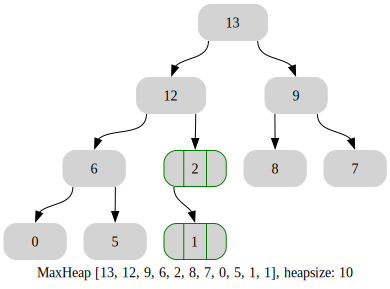

[Heap.swap] ('[(MaxHeap [13, 12, 9, 6, 2, 8, 7, 0, 5, 1, 1], heapsize: 10, 4, 9), {}]', 'AFTER')
[heapify] ('[(MaxHeap [13, 12, 9, 6, 2, 8, 7, 0, 5, 1, 1], heapsize: 10, 9), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [13, 12, 9, 6, 2, 8, 7, 0, 5, 1, 1], heapsize: 10, 9), {}]', 'AFTER')
[heapify] ('[(MaxHeap [13, 12, 9, 6, 2, 8, 7, 0, 5, 1, 1], heapsize: 10, 4), {}]', 'AFTER')
[heapify] ('[(MaxHeap [13, 12, 9, 6, 2, 8, 7, 0, 5, 1, 1], heapsize: 10, 1), {}]', 'AFTER')
[heapify] ('[(MaxHeap [13, 12, 9, 6, 2, 8, 7, 0, 5, 1, 1], heapsize: 10, 0), {}]', 'AFTER')
Heap.pop -> 15
[pop] ('[(MaxHeap [13, 12, 9, 6, 2, 8, 7, 0, 5, 1], heapsize: 10,), {}]', 'AFTER')
[peek] ('[(MaxHeap [13, 12, 9, 6, 2, 8, 7, 0, 5, 1], heapsize: 10,), {}]', 'BEFORE')
[peek] ('[(MaxHeap [13, 12, 9, 6, 2, 8, 7, 0, 5, 1], heapsize: 10,), {}]', 'AFTER')
head: 15, next: 13


In [37]:
A = MaxHeap([15,13,9,5,12,8,7,0,6,2,1])
head = A.pop()
print(f'head: {head}, next: {A.peek()}')

### Illustrate MaxHeap.insert

[insert] ("[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 1,), {'key': 10, 'sentinel': -inf}]", 'BEFORE')
[build] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 1,), {}]', 'BEFORE')
====
i: 5
===
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 5), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 5), {}]', 'AFTER')
====
i: 4
===
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 4), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 4), {}]', 'AFTER')
====
i: 3
===
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 3), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 3), {}]', 'AFTER')
====
i: 2
===
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 2), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 

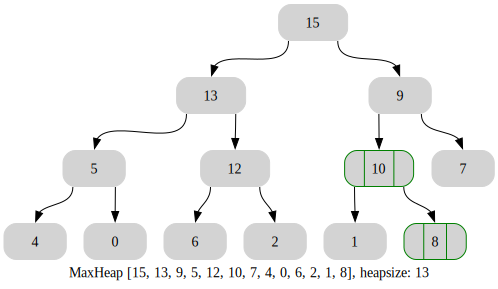

[Heap.swap] ('[(MaxHeap [15, 13, 9, 5, 12, 10, 7, 4, 0, 6, 2, 1, 8], heapsize: 13, 12, 5), {}]', 'AFTER')
[Heap.swap] ('[(MaxHeap [15, 13, 9, 5, 12, 10, 7, 4, 0, 6, 2, 1, 8], heapsize: 13, 5, 2), {}]', 'BEFORE')


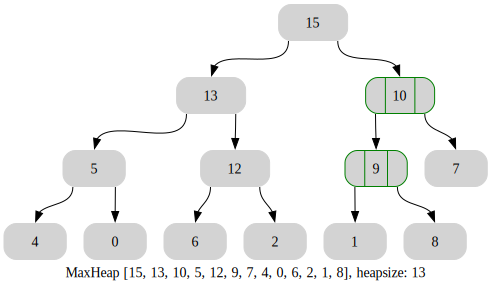

[Heap.swap] ('[(MaxHeap [15, 13, 10, 5, 12, 9, 7, 4, 0, 6, 2, 1, 8], heapsize: 13, 5, 2), {}]', 'AFTER')
[bubbleup] ("[(MaxHeap [15, 13, 10, 5, 12, 9, 7, 4, 0, 6, 2, 1, 8], heapsize: 13,), {'idx': 12, 'key': 10, 'idx_predicate': <function <lambda>.<locals>.<lambda> at 0x10dc51900>}]", 'AFTER')
[insert] ("[(MaxHeap [15, 13, 10, 5, 12, 9, 7, 4, 0, 6, 2, 1, 8], heapsize: 13,), {'key': 10, 'sentinel': -inf}]", 'AFTER')


In [38]:
A = MaxHeap([15,13,9,5,12,8,7,4,0,6,2,1])
A.insert(10)

### Pseudocode for MinPriorityQueue (6.5-3)

```pseudo
MinHeap.minimum(A):
    return A[1]

MinHeap.extractMin(A):
    rv = MinHeap.minimum(A)
    A[1] = A.heapsize
    A.heapsize -= 1
    heapify(A, 1)

MinHeap.decreaseKey(A, idx, key):
    if key > A[idx]:
        error 'heap prop violation'
    A[idx] = key
    while idx > 1 and A[parent(idx)] < A[idx]:
        exchange A[parent(idx)] with A[idx]
        idx = parent(idx)

MinHeap.insert(A, key):
    A.heapsize += 1
    A[heapsize] = inifinity
    MinHeap.decreaseKey(A, A.heapsize, key)
```

### Why use $\pm \infty$ in Heap.bubbleup?
The first line of bubble up asserts that the heap-property is obeyed invariantly at initialization of this algorithm, and maintained at every iteration of this algorithm. In order to make the first iteration work, and to support entering any number, we can $\pm \infty$ as a bound that any number can stay wtihin

### Argue the correctness of Heap-Increase-Key using the following loop invariant (6.5-5)
> Given:
> - `A[1..A.heapsize]` satisfies the maxheap property with 1 possible exception:
>   - `A[i]` may be greater than `A[parent(i)]`
> At the start of each iteration of the **while** loop:
> - `A[parent(i)] >= A[left(i)]` unless `A[left(i) == null` 
> - `A[parent(i)] >= A[right(i)]` unless `A[right(i) == null` 

The children of `[i]`, are known to satisfy the maxheap property. As such, they must be less-than-or-equal to `[i]`. 

`[i]` may be greater that `parent(i)`, but we know that the rest of `A` abides by the max heap property.

This is like a scenario where we have inserted the element currently at `[i]`, and are now bubbling it up to its correct spot in the heap. 

As such, we can be sure that the current children of `[i]` are less-than-or-equal to `[parent(i)]`

### Can exchange/swap use less than 3 assignments? (6.5-6)
Consider $InsertionSort$. 

```python
def insertionSort(A:list[int]):
    for j in range(1..len(A)):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] < key:
            A[i+1] = A[i]
            i -= 1
        A[i+1] = key
```

While we iterate, waiting for the right spot for our `key` (which we have stored in a variable), we shift elements right, overwriting along the way. 

The first slot that gets overwritten is `[j]`... we call this `[i+1]`. Good thing we stored its value in `key`.

Once `[i+1]` is overwritten, `[i]` still has the old value... but we dont care about it. We treat it as overwriteable. Lets call this **the detritus**

Finally, when we have found the lower bound, we insert.

Now, consider how `swap` is implemented:

```python
def swap(A, i, j):
    temp = A[i]
    A[i] = A[j]
    A[j] = temp
```

...

and how it is called in `Heap.bubbleup`
```python
def bubbleup(self:Heap, idx, key, idx_predicate:Callable[[int,int], bool]):
    assert idx_predicate(idx, key)
    self[idx] = key
    while idx > 0 and self.heap_property_violation(self.parent(idx)):
        self.swap(idx, self.parent(idx))  ################################# <- here.
        idx = self.parent(idx)
Heap.bubbleup = Heap.logger(bubbleup)
MaxHeap.bubbleup = lambda self, idx, key: Heap.bubbleup(self, idx=idx, key=key, idx_predicate=lambda idx, key: not key < self[idx])
MinHeap.bubbleup = lambda self, idx, key: Heap.bubbleup(self, idx=idx, key=key, idx_predicate=lambda idx, key: not key > self[idx])
```
...expanded...
```python
def bubbleup(A:Heap, idx, key):
    assert...
    while idx > 0 and self.heappropertyviolation(self.parent(idx)):
        temp = A[i]
        A[i] = A[j]
        A[j] = temp
        idx = self.parent(idx)
```

Is there a way to get this down to 1 assignment?

> Maybe 
```python
def bubbleup(A:Heap, idx, key):
    assert...
    while idx > 0 and self.heappropertyviolation(self.parent(idx)):
        A[idx] = A[self.parent(i)]
        i = self.parent(i)
```

I think that this will work because the heap property will continue to hold, even with **the detritus**.... children are allowed to be equal to parents.

### FIFO queue & FILO stack with a priority queue (6.5-7)
Suppose we use a minheap. To make a FIFO queue, every time we insert with decreasing priority each time.
For a LIFO stack, we could just insert with decreasing priority.

To reimplement all the stuff in here would be kind of a pain in the ass... let it suffice to name refactors:

- Heaps would be made of entries that are basically objects that look like this:
```python
from typing import Any

class PriorityWrapper():
    def __init__(self, priority:int, data:Any):
        self.key:int = priority
        self.data = data 
```
- when comparing `self[i]` and `self[j]`, we would want to drill down further, comparing the `.key` of each.


### Implement Heap.delete (6.5-8)

In [39]:
def delete(self:Heap, idx, should_bubbledown:Callable[int,bool]):
    assert self.length == self.heapsize
    if should_bubbledown(idx):
        self[idx] = self[-1]
        self.heapify(idx)
    else:
        self.bubbleup(idx, self[-1])
    self.heapsize -=1
    self.length -=1
    self.ls = self.ls[:-1]
Heap.delete = Heap.logger(delete)
MaxHeap.delete = MaxHeap.logger(lambda self, idx: Heap.delete(self, idx, (lambda idx: self[idx] < self[-1])))
MaxHeap.delete = MinHeap.logger(lambda self, idx: Heap.delete(self, idx, (lambda idx: self[idx] > self[-1])))
del delete

[build] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 1,), {}]', 'BEFORE')
====
i: 5
===
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 5), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 5), {}]', 'AFTER')
====
i: 4
===
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 4), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 4), {}]', 'AFTER')
====
i: 3
===
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 3), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 3), {}]', 'AFTER')
====
i: 2
===
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 2), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 2), {}]', 'AFTER')
====
i: 1
===
[heapify] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], hea

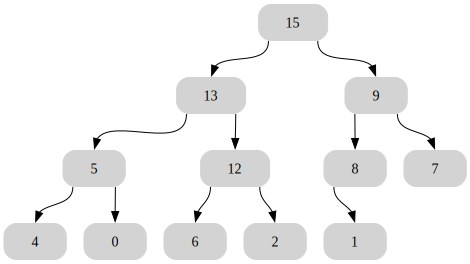

[<lambda>] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 2), {}]', 'BEFORE')
[delete] ('[(MaxHeap [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 2, <function <lambda>.<locals>.<lambda> at 0x10dc517a0>), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 1, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 2), {}]', 'BEFORE')
[Heap.swap] ('[(MaxHeap [15, 13, 1, 5, 12, 8, 7, 4, 0, 6, 2, 1], heapsize: 12, 2, 5), {}]', 'BEFORE')


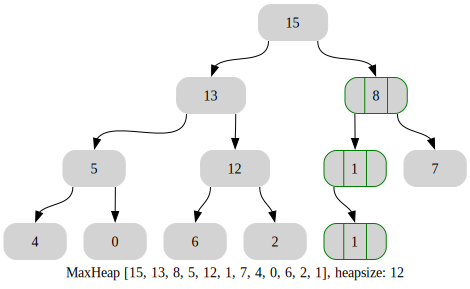

[Heap.swap] ('[(MaxHeap [15, 13, 8, 5, 12, 1, 7, 4, 0, 6, 2, 1], heapsize: 12, 2, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [15, 13, 8, 5, 12, 1, 7, 4, 0, 6, 2, 1], heapsize: 12, 5), {}]', 'BEFORE')
[heapify] ('[(MaxHeap [15, 13, 8, 5, 12, 1, 7, 4, 0, 6, 2, 1], heapsize: 12, 5), {}]', 'AFTER')
[heapify] ('[(MaxHeap [15, 13, 8, 5, 12, 1, 7, 4, 0, 6, 2, 1], heapsize: 12, 2), {}]', 'AFTER')
[delete] ('[(MaxHeap [15, 13, 8, 5, 12, 1, 7, 4, 0, 6, 2], heapsize: 11, 2, <function <lambda>.<locals>.<lambda> at 0x10dc517a0>), {}]', 'AFTER')
[<lambda>] ('[(MaxHeap [15, 13, 8, 5, 12, 1, 7, 4, 0, 6, 2], heapsize: 11, 2), {}]', 'AFTER')


In [40]:
mh = MaxHeap([15,13,9,5,12,8,7,4,0,6,2,1]).build()
mh.highlight_nodes()
mh.delete(2)

### Merge lists using a min-heap (6.5-9)
> Give an $O(n \lg k)$-time algorithm to merge $k$ sorted lists into one sorted list where $n$ is the toal number elements in all the input lists. (*Hint:* Use a min heap for k-way merging)

Since sorted lists are min-heaps,...
calling pop to give us a set of $\lceil k \rceil$ to choose from will always surface the smallest possible elements first.

In [43]:
def slow_merge_sorted(*ls:list[int]):
    if not ls:
        return None
    if len(ls) == 1:
       return ls[0]
    kheap = MinHeap(ls[0]).build() # O(lg a), where a = [0].length
    for l in ls[1:]:               # Theta(lg k-1), where ls.length
        for v in l:                # Theta(n),  where n is l.length, for any given l in ls
            kheap.insert(v)        # O(lg b), where b = kheap.length, as it grows towards sum of all m's
    rv = []
    while len(kheap.ls) > 0:       # O(b) multiplier
        rv.append(kheap.pop())     # O(lg b))
    return rv                      # TOTAL: O(lg a) + Theta(lg k-1) + Theta(n) + O(lg b) + O(b lg b), which reduces to O(b-lg b), which is bigger than expected

def better_merge_sorted(*ls:list[int]):
    if not ls:
        return None
    if len(ls) == 1:
       return ls[0]
    kheap = MinHeap([l.pop(0) for l in ls])       # O(k + lg k)
    rv = []        
    while kheap.ls:                               # O(n) multiplier
        rv.append(kheap.pop())                    # O(lg kheap.length)
        [kheap.insert(l.pop(0)) for l in ls if l] # O(k * sum(lg l.length))
                                                  # --> this is what makes it slow, because it makes increases the number of elements to re-heapify out of step with the pace set by the original heap size 
    return rv                                     # TOTAL: O(k + lg k) + O(lg k) + O(k lg n ) ... but we can do better, and get ourselves a Theta....

def even_better_merge_sorted(*ls:list[int]):
    if not ls:
        return None
    if len(ls) == 1:
       return ls[0]
    rv = []
    lss = [                                          # this is still extra overhead. 
        [(e, ls_idx) for e in l] 
        for ls_idx, l in dict(enumerate(ls)).items()
    ]
    disable_graphviz()
    kheap = MinHeap([l.pop(0) for l in lss])
    while kheap.length > 0:
        (head, ls_idx) = kheap.pop()
        rv.append(head)
        if lss[ls_idx]:
            kheap.insert(lss[ls_idx].pop(0))
    enable_graphviz(kheap)
    return rv

def nearly_best_merge_sorted(*ls:list[int]):
    if not ls:
        return None
    if len(ls) == 1:
       return ls[0]
    rv = []
    disable_graphviz()
    kheap = MinHeap([(l.pop(0), list_idx) for list_idx, l in enumerate(ls)]) # pop(0) will be expensive, because list is a dynamic array. it might be saner to use dequeues, or reverse the ls's
    while kheap.length > 0:
        (head, ls_idx) = kheap.pop()
        rv.append(head)
        if ls[ls_idx]:
            kheap.insert((ls[ls_idx].pop(0), ls_idx))
    enable_graphviz(kheap)
    return rv
            
def merge_sorted(*ls:list[int]):
    if not ls:
        return None
    if len(ls) == 1:
       return ls[0]
    rv = []
    [l.reverse() for l in ls]
    disable_graphviz()
    kheap = MinHeap([(l.pop(), list_idx) for list_idx, l in enumerate(ls)]) 
    while kheap.length > 0:
        (head, ls_idx) = kheap.pop()
        enable_graphviz(kheap)
        rv.append(head)
        if ls[ls_idx]:
            kheap.insert((ls[ls_idx].pop(), ls_idx))
    return rv

In [44]:
merge_sorted([1,2],[5,6], [3,4,9], [8,11])

node value must be a float/int/str
[pop] ('[(MinHeap [(1, 0), (5, 1), (3, 2), (8, 3)], heapsize: 1,), {}]', 'BEFORE')
[build] ('[(MinHeap [(1, 0), (5, 1), (3, 2), (8, 3)], heapsize: 1,), {}]', 'BEFORE')
====
i: 1
===
[heapify] ('[(MinHeap [(1, 0), (5, 1), (3, 2), (8, 3)], heapsize: 4, 1), {}]', 'BEFORE')
[heapify] ('[(MinHeap [(1, 0), (5, 1), (3, 2), (8, 3)], heapsize: 4, 1), {}]', 'AFTER')
====
i: 0
===
[heapify] ('[(MinHeap [(1, 0), (5, 1), (3, 2), (8, 3)], heapsize: 4, 0), {}]', 'BEFORE')
[heapify] ('[(MinHeap [(1, 0), (5, 1), (3, 2), (8, 3)], heapsize: 4, 0), {}]', 'AFTER')
node value must be a float/int/str
[build] ('[(MinHeap [(1, 0), (5, 1), (3, 2), (8, 3)], heapsize: 4,), {}]', 'AFTER')
[peek] ('[(MinHeap [(1, 0), (5, 1), (3, 2), (8, 3)], heapsize: 4,), {}]', 'BEFORE')
[peek] ('[(MinHeap [(1, 0), (5, 1), (3, 2), (8, 3)], heapsize: 4,), {}]', 'AFTER')
[heapify] ('[(MinHeap [(8, 3), (5, 1), (3, 2), (8, 3)], heapsize: 3, 0), {}]', 'BEFORE')
[Heap.swap] ('[(MinHeap [(8, 3), (5, 1),

[1, 2, 3, 4, 5, 6, 8, 9, 11]